In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,D
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,D
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,C
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,B
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,C


In [3]:
mainData.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Muhammad Ameerul Bin Azman

In [4]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape

(395, 1)

<AxesSubplot:xlabel='G3', ylabel='count'>

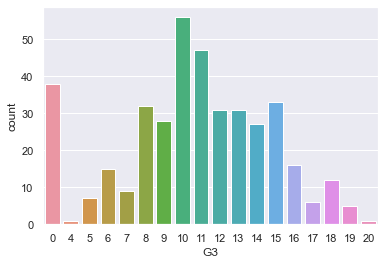

In [5]:
sb.countplot(data=mainData, x="G3")

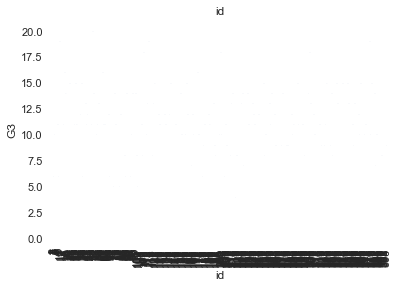

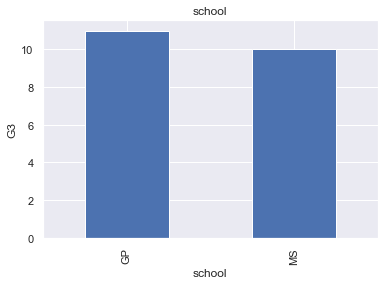

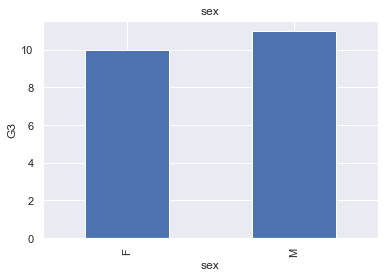

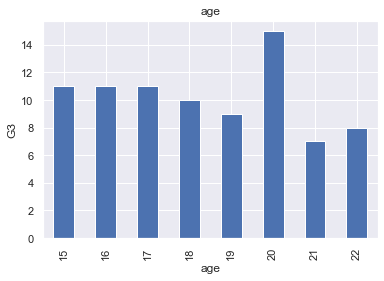

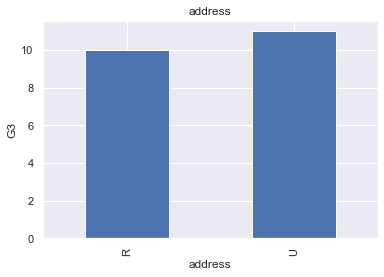

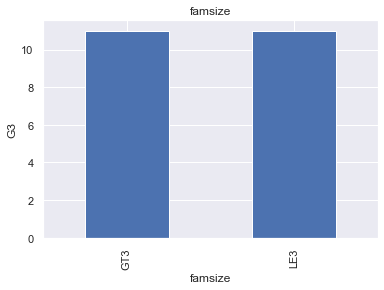

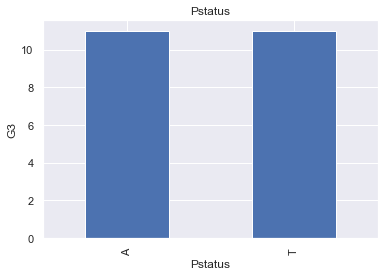

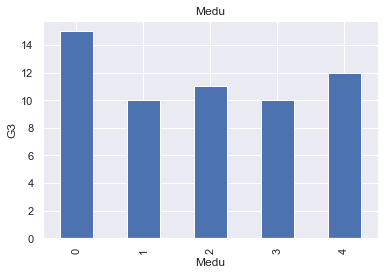

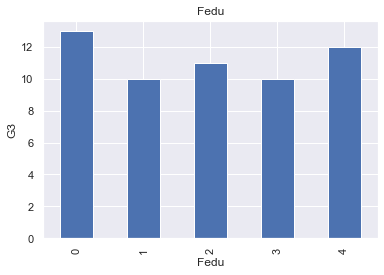

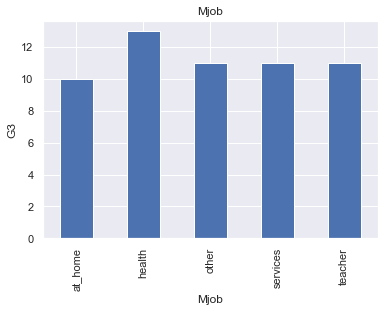

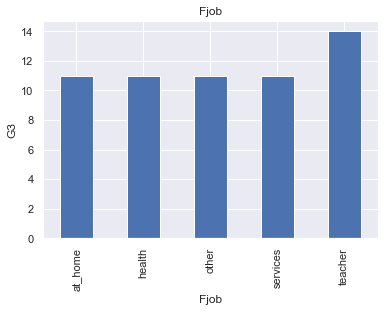

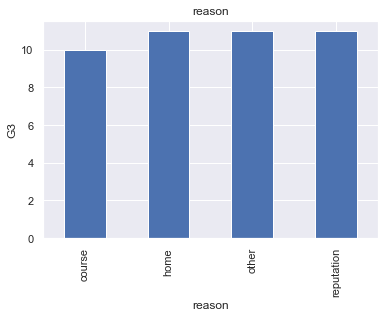

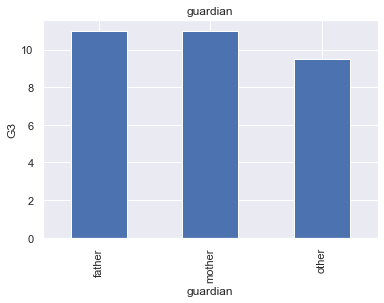

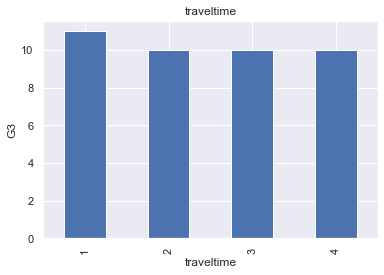

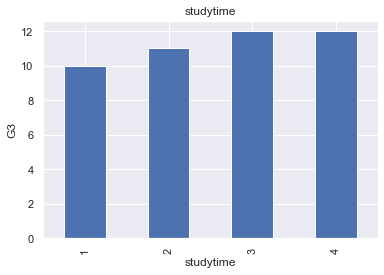

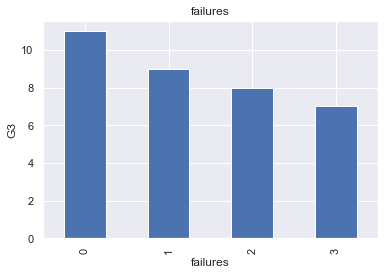

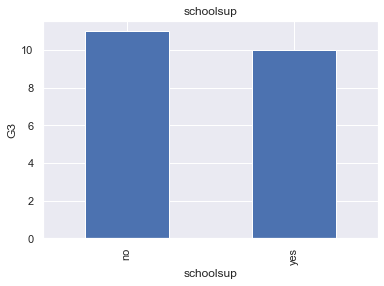

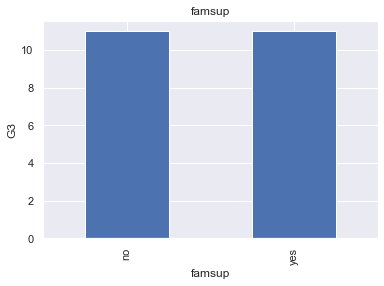

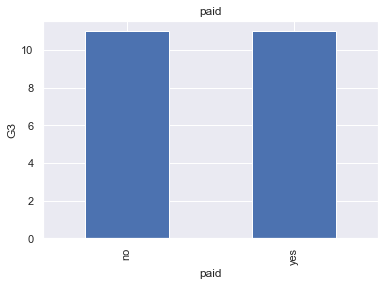

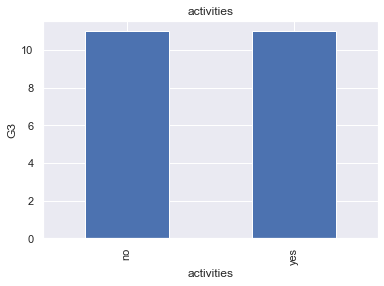

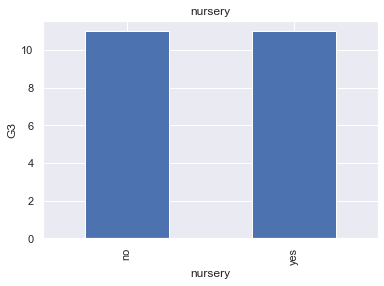

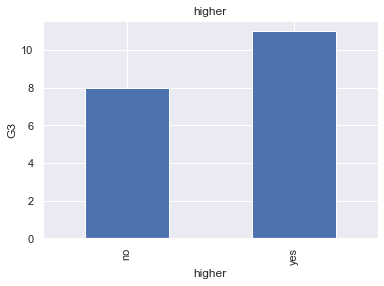

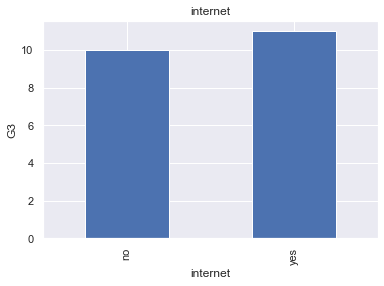

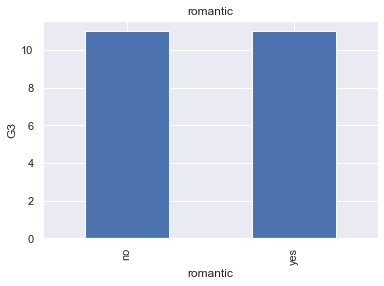

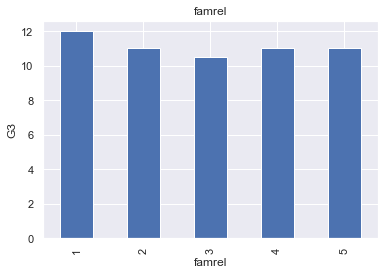

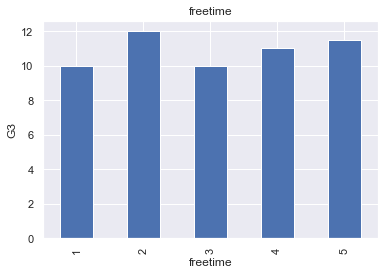

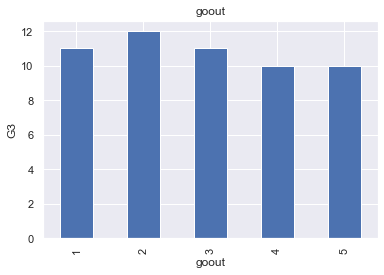

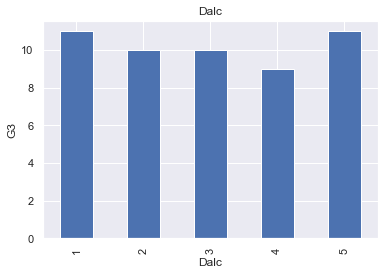

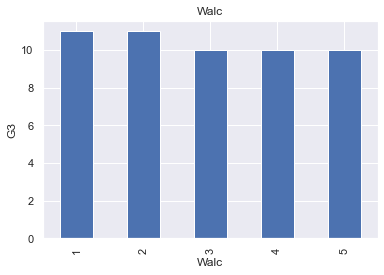

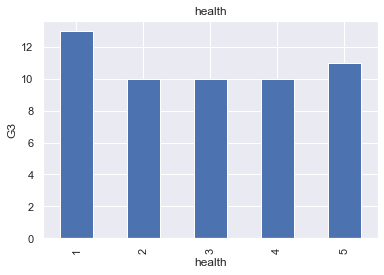

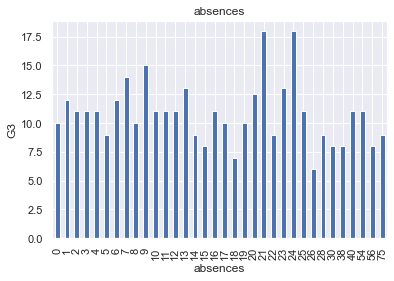

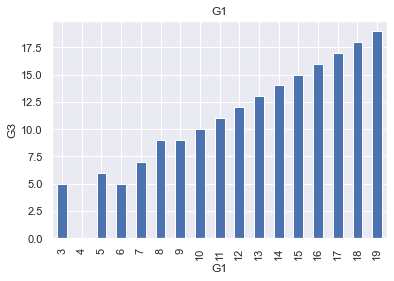

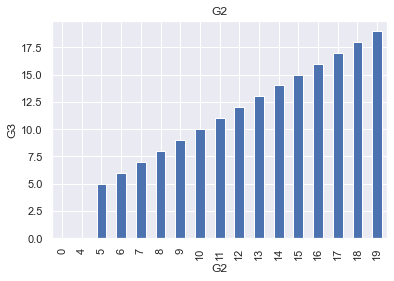

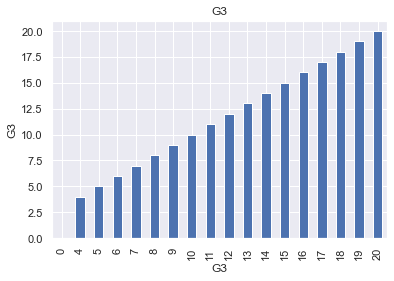

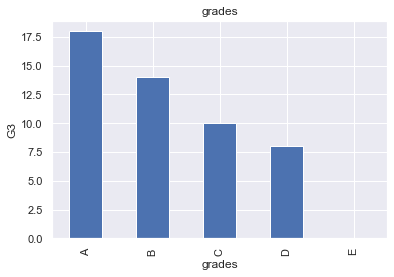

In [6]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

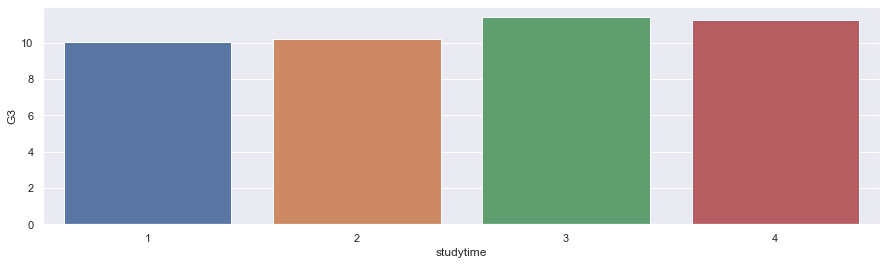

In [7]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', data=mainData, ci=None)
plt.show()

<AxesSubplot:xlabel='studytime', ylabel='G3'>

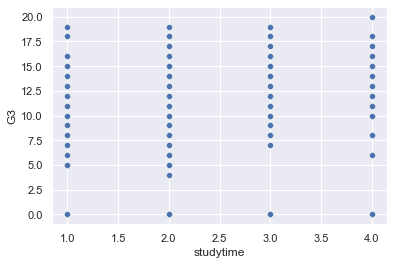

In [12]:
sb.scatterplot(x = "studytime", 
                y = "G3", 
                data = mainData)

<AxesSubplot:xlabel='studytime', ylabel='G3'>

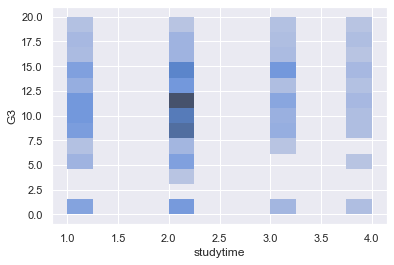

In [13]:
sb.histplot(x = "studytime", y = "G3", data = mainData)

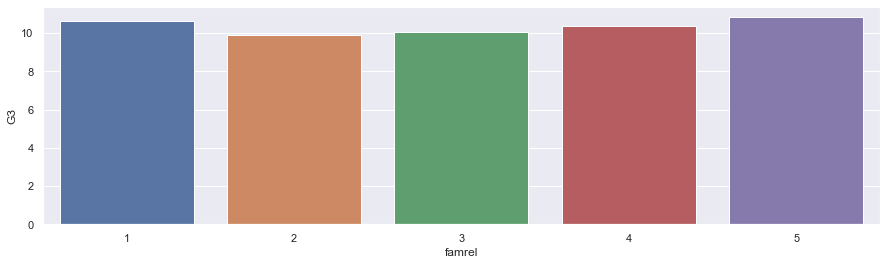

In [8]:
#famrel vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='famrel', y='G3', data=mainData, ci=None)
plt.show()

<AxesSubplot:xlabel='famrel', ylabel='G3'>

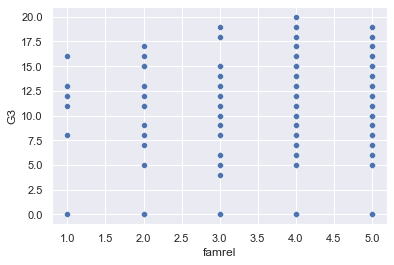

In [14]:
sb.scatterplot(x = "famrel", 
                y = "G3", 
                data = mainData)

<AxesSubplot:xlabel='famrel', ylabel='G3'>

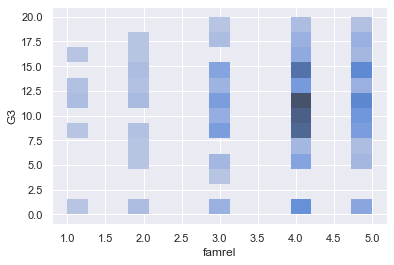

In [15]:
sb.histplot(x = "famrel", y = "G3", data = mainData)

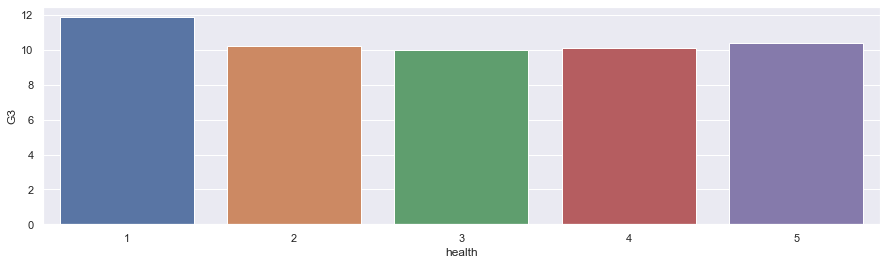

In [9]:
#health vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='health', y='G3', data=mainData, ci=None)
plt.show()

<AxesSubplot:xlabel='health', ylabel='G3'>

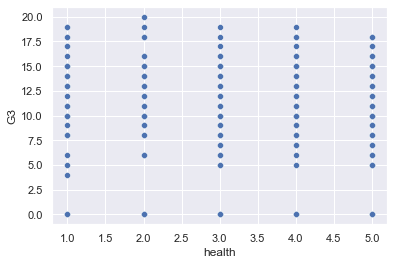

In [16]:
sb.scatterplot(x = "health", 
                y = "G3", 
                data = mainData)

<AxesSubplot:xlabel='health', ylabel='G3'>

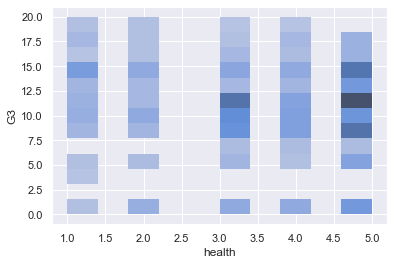

In [17]:
sb.histplot(x = "health", y = "G3", data = mainData)

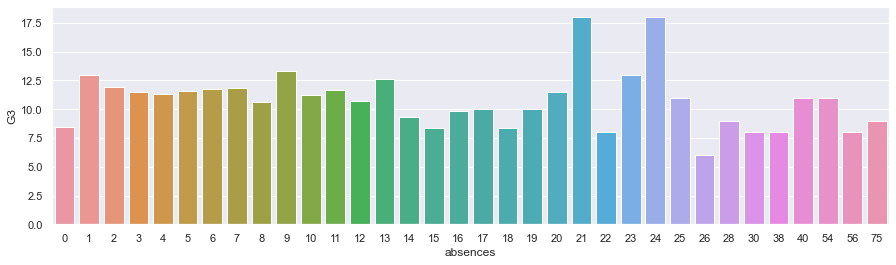

In [10]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', data=mainData, ci=None)
plt.show()

<AxesSubplot:xlabel='absences', ylabel='G3'>

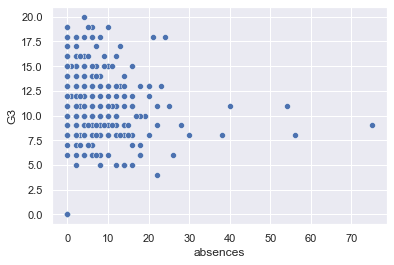

In [18]:
sb.scatterplot(x = "absences", 
                y = "G3", 
                data = mainData)

<AxesSubplot:xlabel='absences', ylabel='G3'>

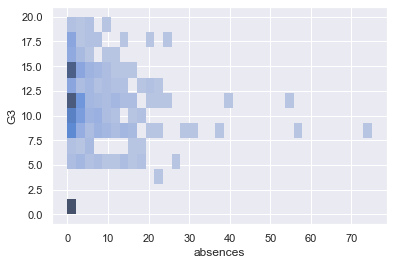

In [19]:
sb.histplot(x = "absences", y = "G3", data = mainData)

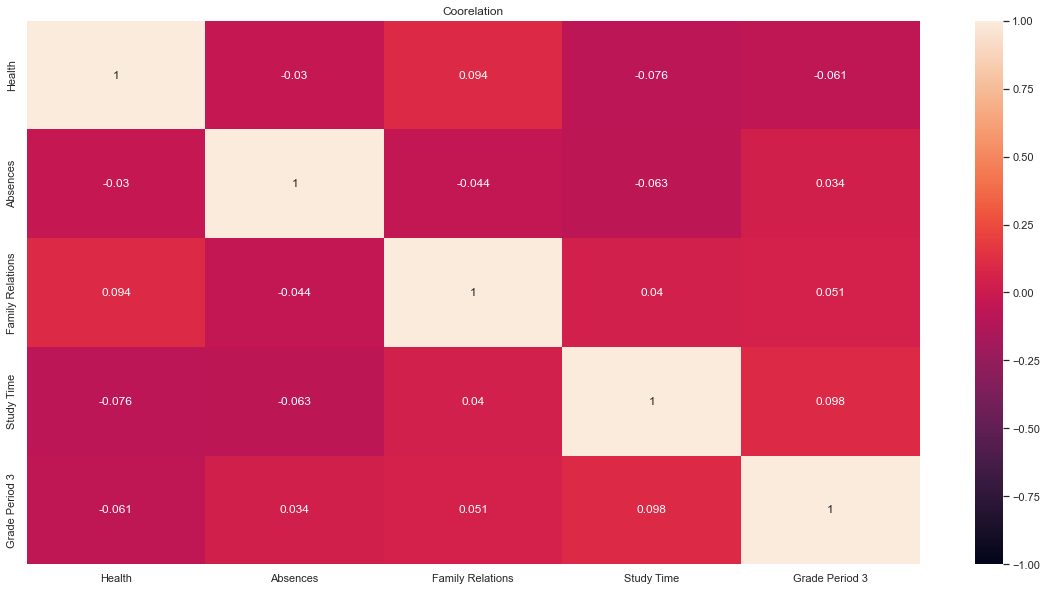

In [20]:
tmp = mainData[['health', 'absences', 'famrel', 'studytime','G3']].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# fig, ax = plt.subplots()
sb.heatmap(data=tmp,vmin = -1, vmax = 1, annot=True)
ax.set_title("Coorelation")
ax.set_xticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
ax.set_yticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
plt.show()

# Peng Teng Kang

In [12]:
trial = pd.DataFrame(mainData[["famrel", "freetime", "goout", "Dalc"]])

In [13]:
trial.head()

,famrel,freetime,goout,Dalc
0,4,3,4,1
1,5,3,3,1
2,4,3,2,2
3,3,2,2,1
4,4,3,2,1


In [14]:
sb.set_style='darkgrid'

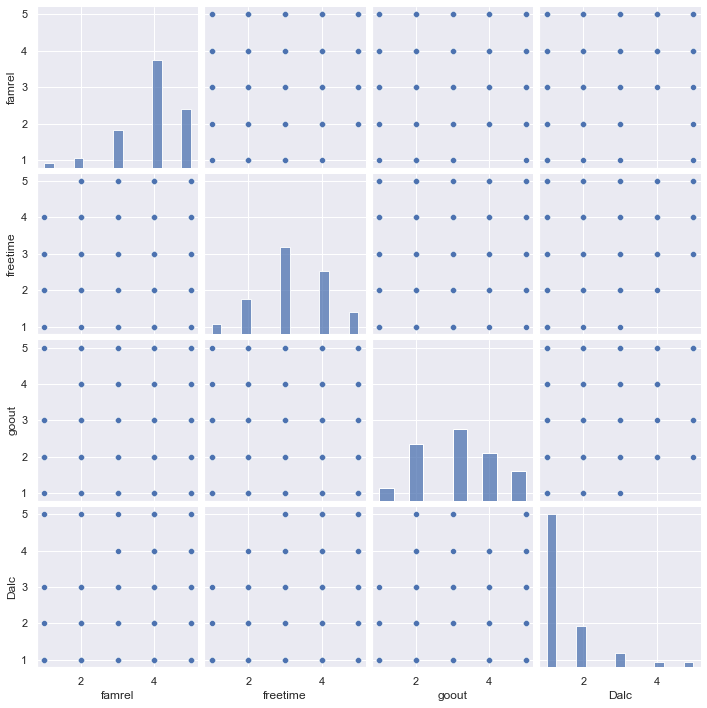

In [15]:
sb.pairplot(trial)

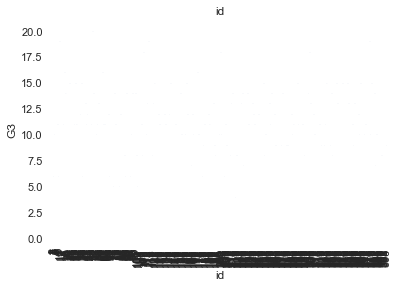

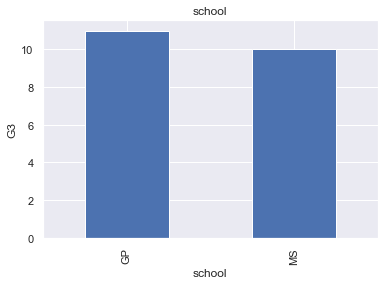

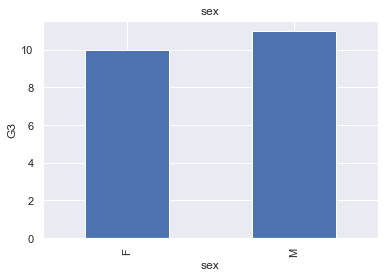

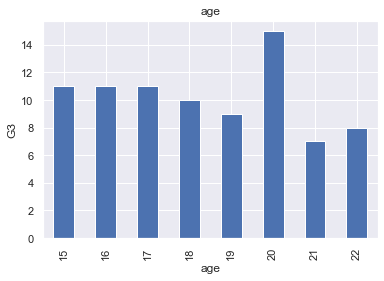

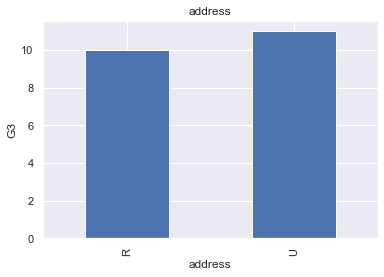

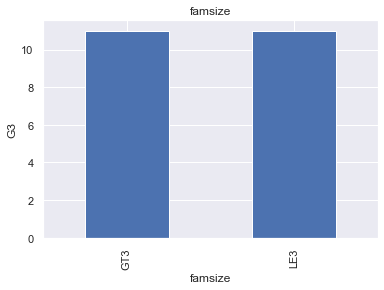

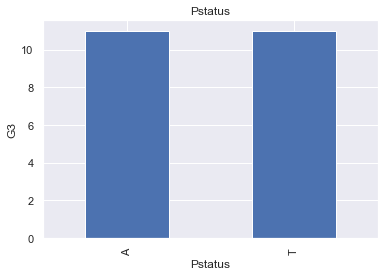

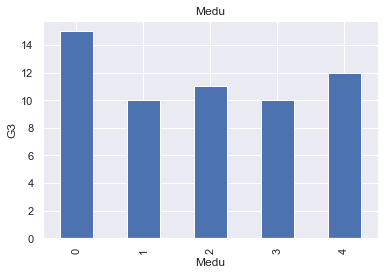

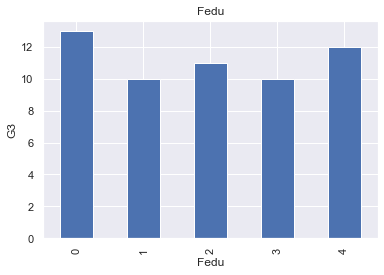

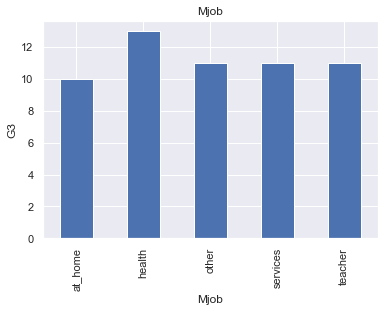

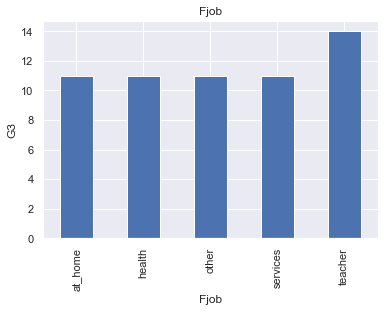

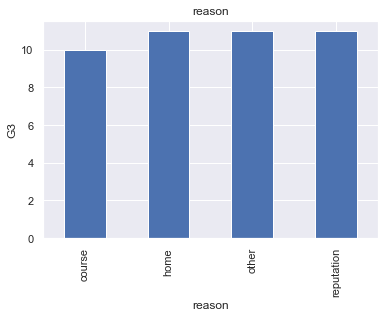

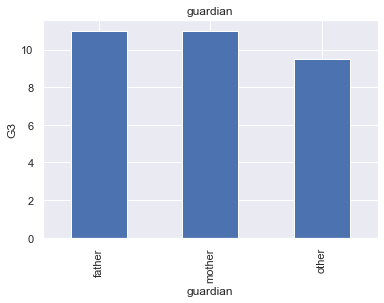

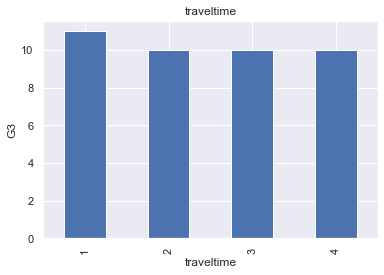

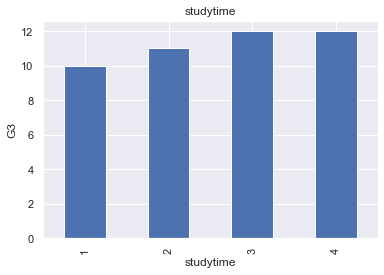

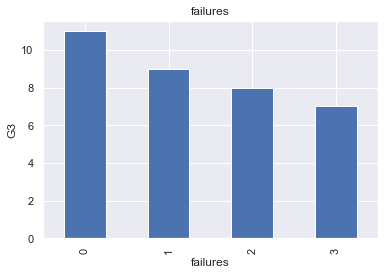

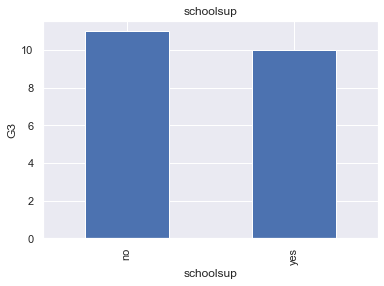

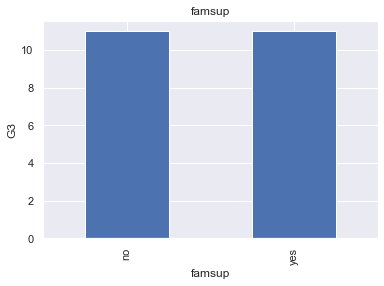

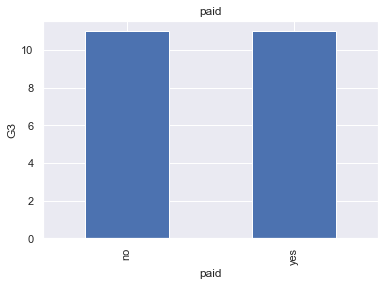

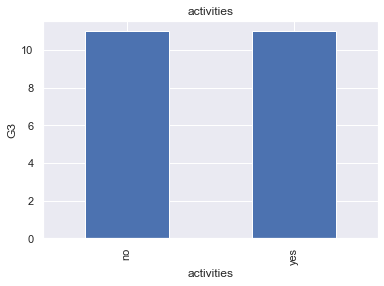

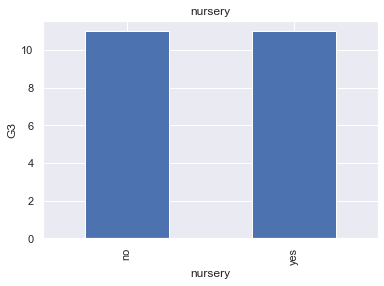

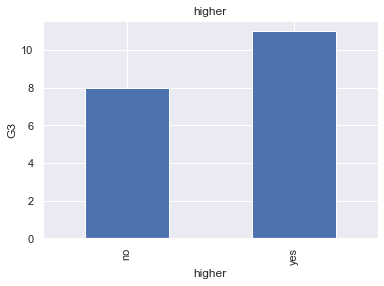

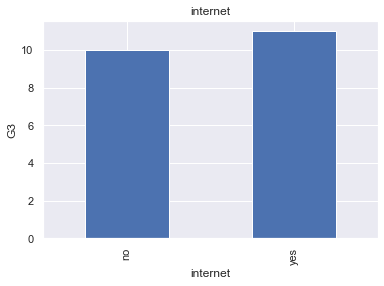

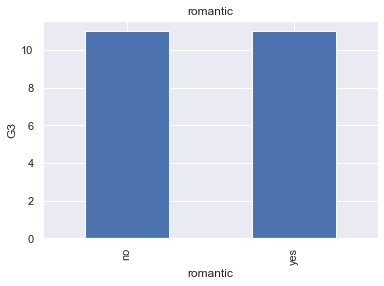

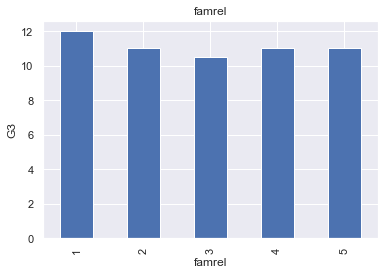

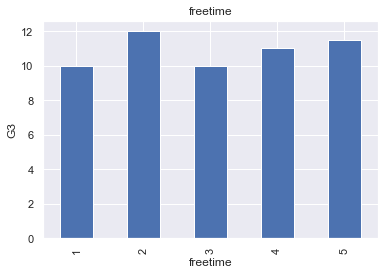

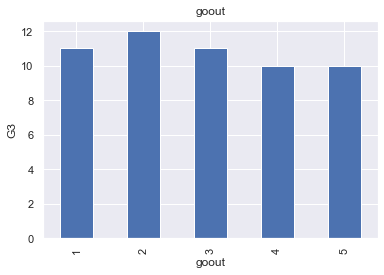

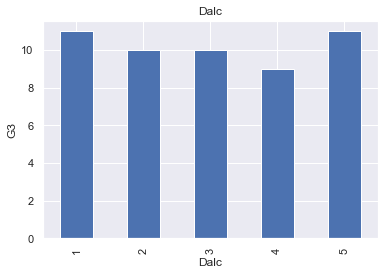

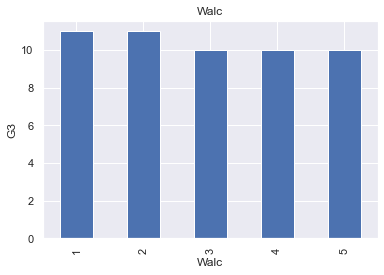

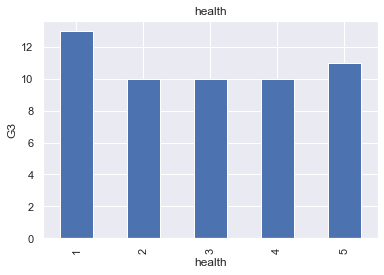

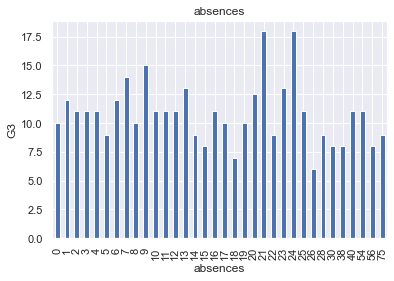

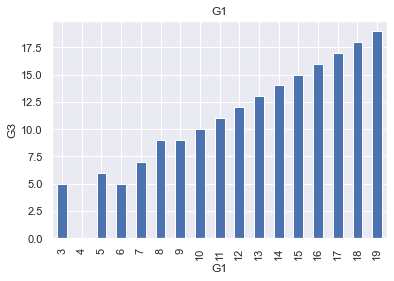

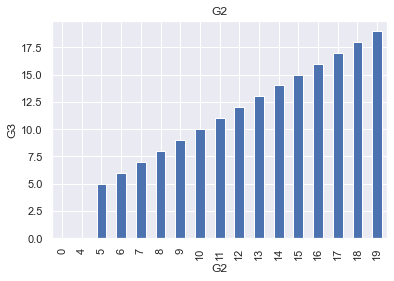

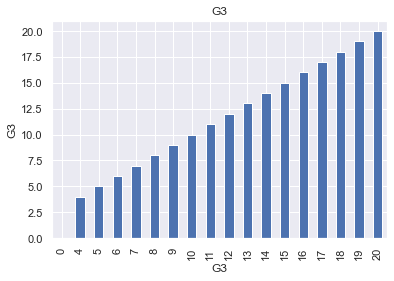

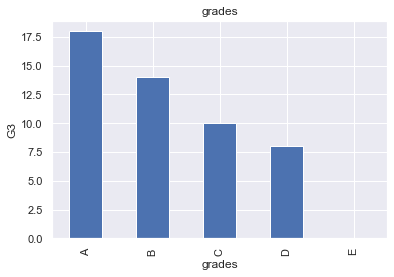

In [16]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

17


<AxesSubplot:>

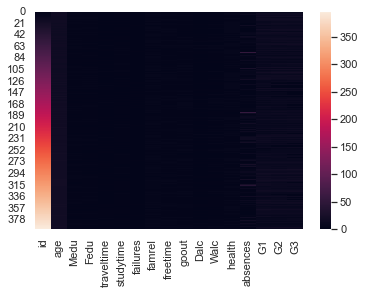

In [17]:
data = mainData.copy()
numerical_features = [
    features for features in data.columns if data[features].dtype != 'O']


print(len(numerical_features))
data[numerical_features].head()
sb.heatmap(data[numerical_features])

In [18]:
# discrete features
discrete_features = [features for features in numerical_features if len(
    data[features].unique()) <= 5]


print(len(discrete_features))
print(discrete_features)
print(data[discrete_features].head())

11
['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
   Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  Dalc  \
0     4     4           2          2         0       4         3      4     1   
1     1     1           1          2         0       5         3      3     1   
2     1     1           1          2         3       4         3      2     2   
3     4     2           1          3         0       3         2      2     1   
4     3     3           1          2         0       4         3      2     1   

   Walc  health  
0     1       3  
1     1       3  
2     3       3  
3     1       5  
4     2       5  


In [19]:
# continous features
continous_features = [
    features for features in numerical_features if features not in discrete_features]

print(len(continous_features))
print(continous_features)
data[continous_features].head()

6
['id', 'age', 'absences', 'G1', 'G2', 'G3']


,id,age,absences,G1,G2,G3
0,1,18,6,5,6,6
1,2,17,4,5,5,6
2,3,15,10,7,8,10
3,4,15,2,15,14,15
4,5,16,4,6,10,10


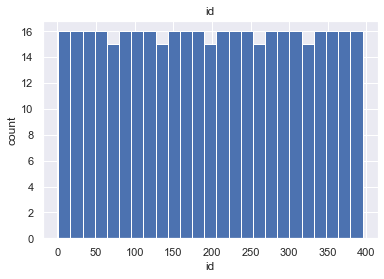

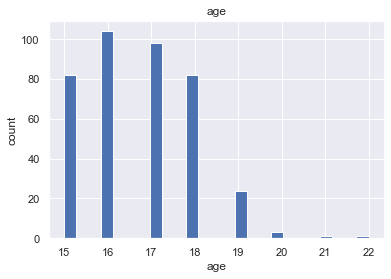

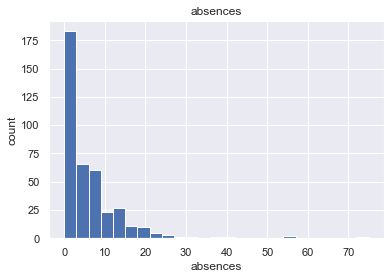

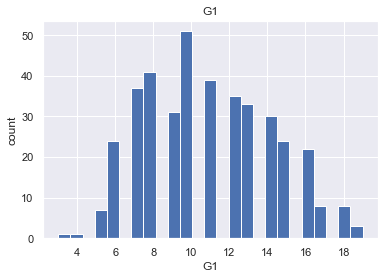

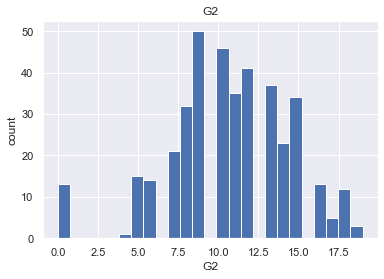

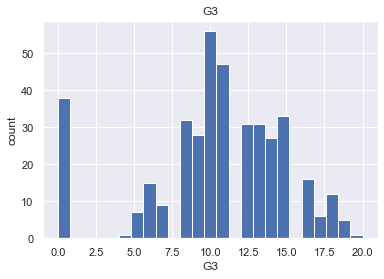

In [20]:
# plotting features to find relaion

for features in continous_features:
    data = mainData.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

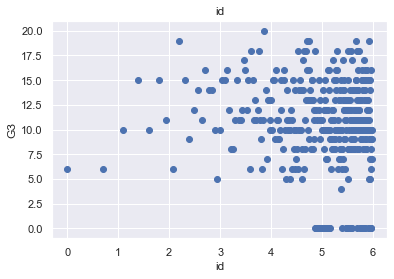

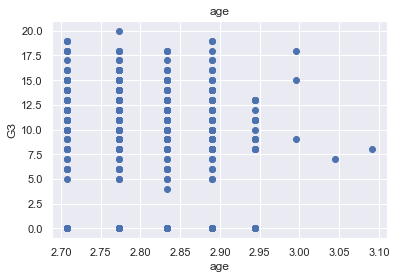

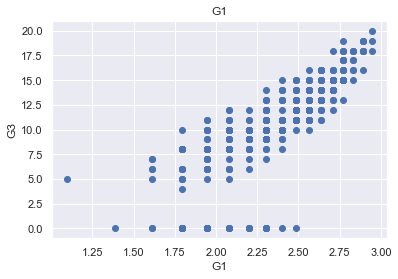

In [21]:
# using lograthmic transformations

for features in continous_features:
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.scatter(data[features], data['G3'])
        plt.xlabel(features)
        plt.ylabel('G3')
        plt.title(features)
        plt.show()

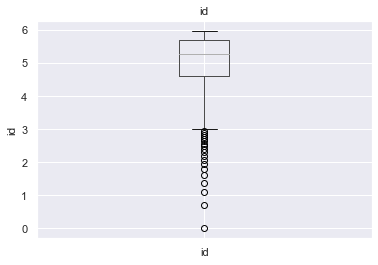

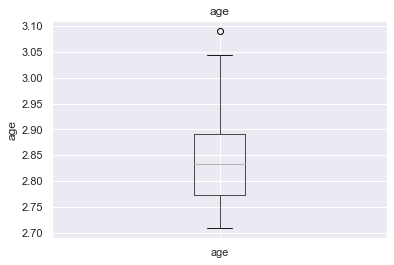

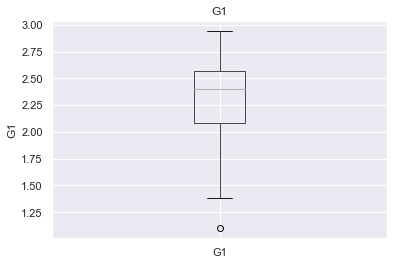

In [22]:
for features in continous_features:  # we use boxplot to find outliers in our data
    data = mainData.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [23]:
categorical_features = [
    features for features in mainData.columns if mainData[features].dtype == 'O']
print(len(categorical_features))
mainData[categorical_features].head()

18


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,D
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,D
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,C
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,B
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,C


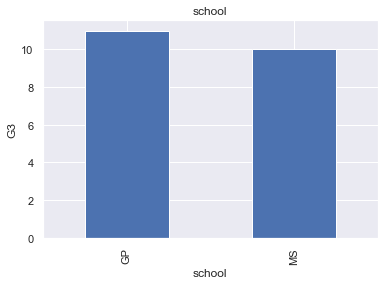

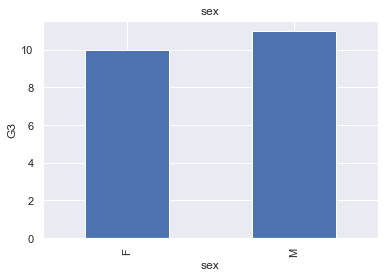

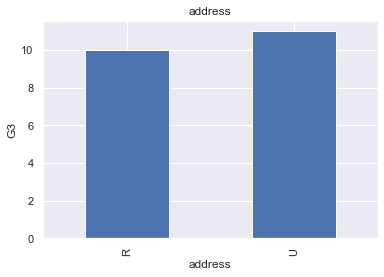

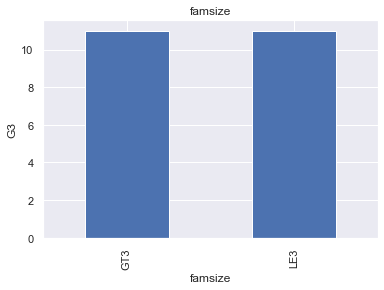

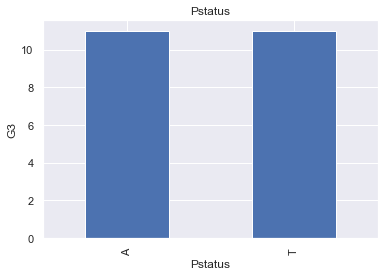

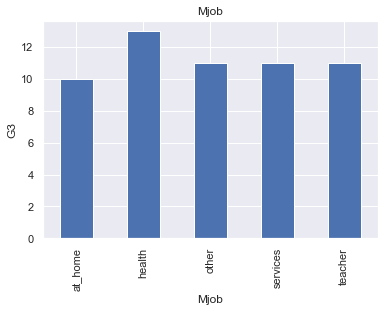

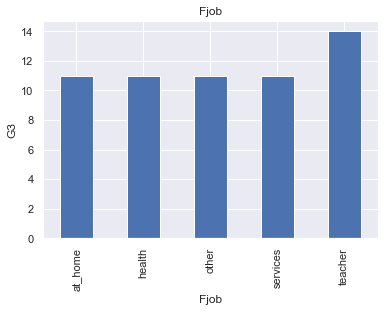

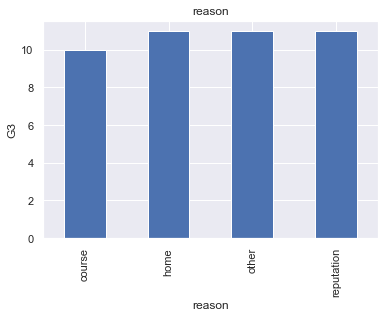

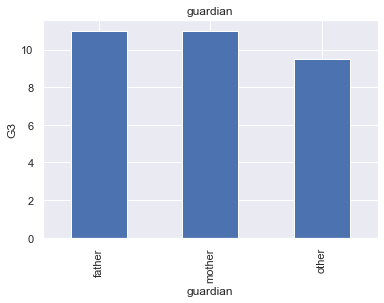

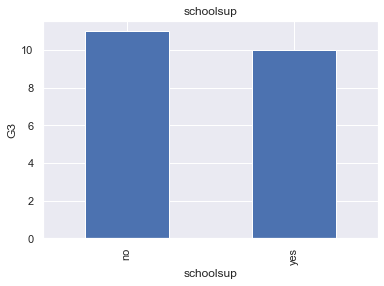

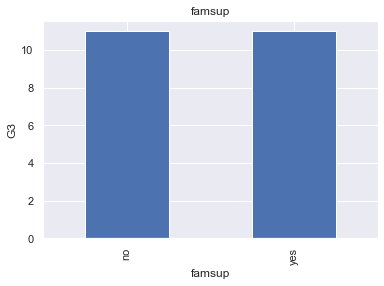

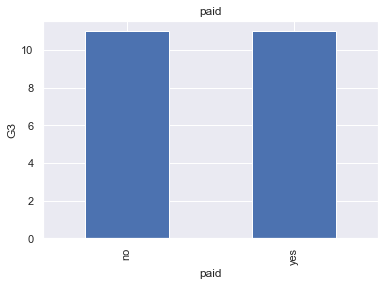

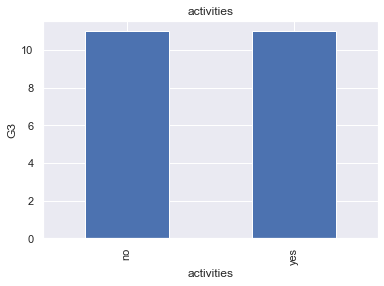

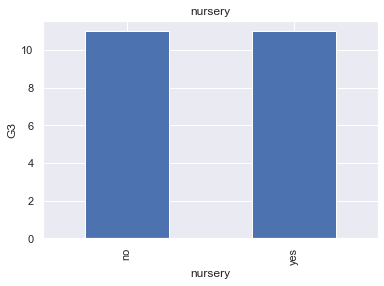

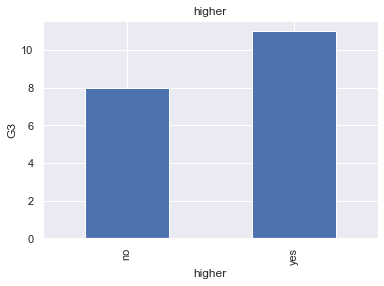

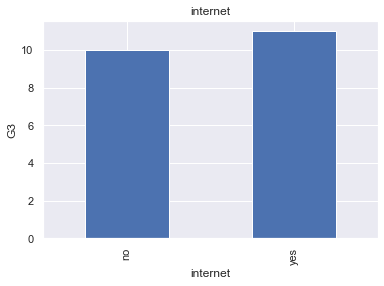

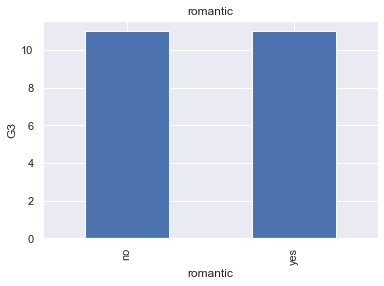

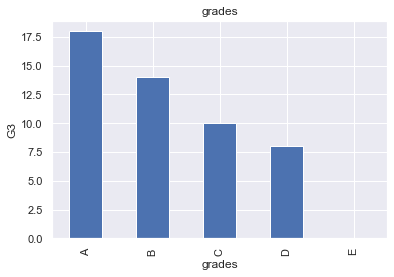

In [24]:
# finding the relationship between categorical variables and dependent variables

for features in categorical_features:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

In [25]:
for feature in categorical_features:
    labels_ordered = mainData.groupby(
        [feature])['G3'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    mainData[feature] = mainData[feature].map(labels_ordered)

mainData[categorical_features].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grades
0,1,0,1,0,1,0,4,0,1,0,1,0,0,1,1,0,1,1
1,1,0,1,0,0,0,1,0,2,1,0,0,0,0,1,1,1,1
2,1,0,1,1,0,0,1,3,1,0,1,1,0,1,1,1,1,2
3,1,0,1,0,0,4,2,1,1,1,0,1,1,1,1,1,0,3
4,1,0,1,0,0,1,1,1,2,1,0,1,0,1,1,0,1,2


In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

feature_scale = [
    features for features in mainData.columns if features not in ['G3']]
print(feature_scale)
scalar.fit_transform(mainData[feature_scale])


mainData = pd.concat([mainData[['G3']].reset_index(drop=True), pd.DataFrame(
    scalar.fit_transform(mainData[feature_scale]), columns=feature_scale)], axis=1)

['id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'grades']


In [27]:
print("Data type : ", type(mainData))
print("Data dims : ", mainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (395, 35)


In [28]:
print(mainData.dtypes)

G3              int64
id            float64
school        float64
sex           float64
age           float64
address       float64
famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery       float64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
grades        float64
dtype: object


In [29]:
G3 = pd.DataFrame(mainData['G3'])
print("Data type : ", type(G3))
print("Data dims : ", G3.size)
G3.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  395


,G3
0,6
1,6
2,10
3,15
4,10


In [30]:
G3.describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


<AxesSubplot:>

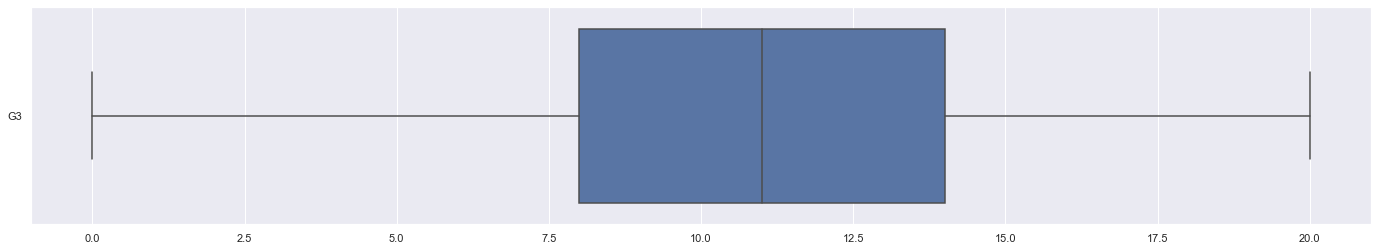

In [31]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = G3, orient = "h")

<AxesSubplot:ylabel='Count'>

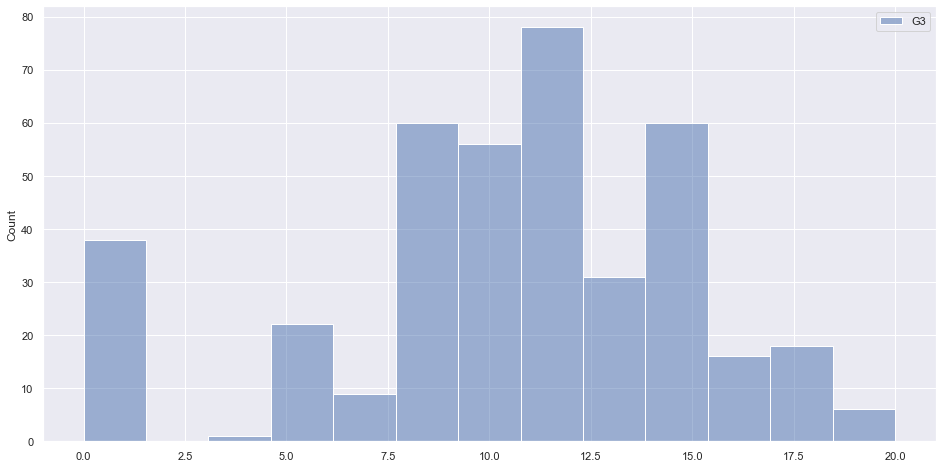

In [32]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3)

<AxesSubplot:ylabel='Density'>

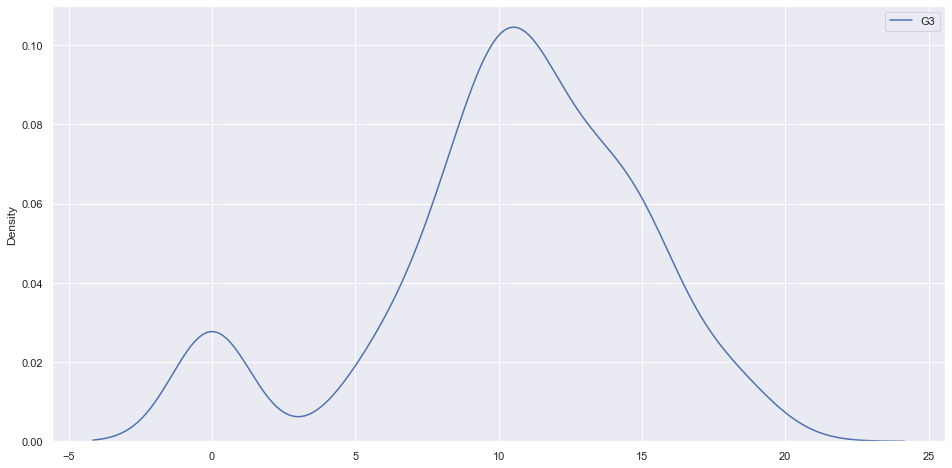

In [33]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = G3)

<AxesSubplot:ylabel='Count'>

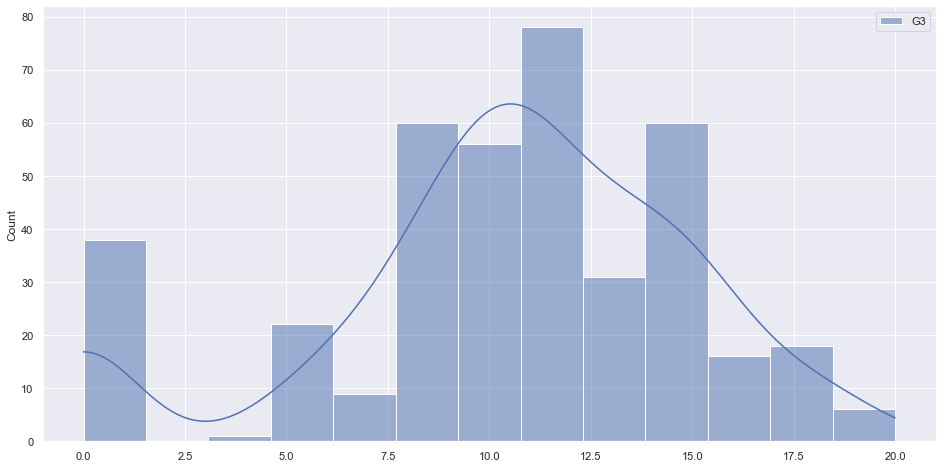

In [34]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = G3, kde = True)

<AxesSubplot:>

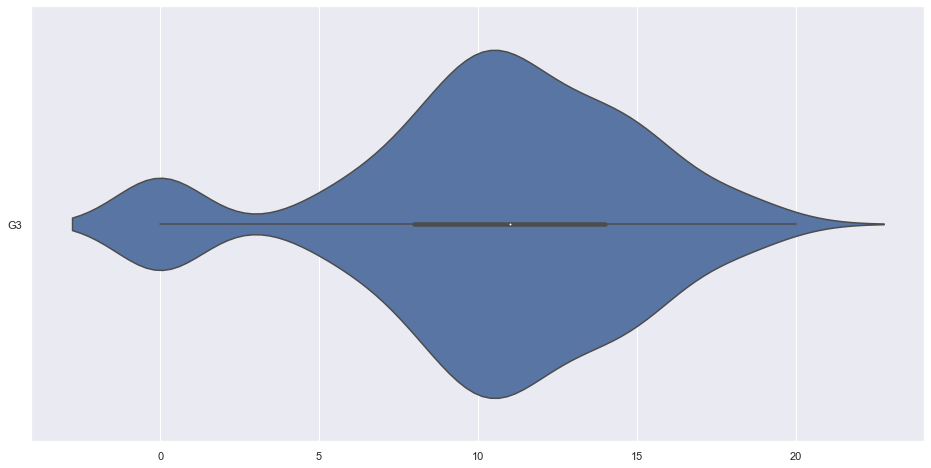

In [35]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = G3, orient = "h")

In [36]:
G3 = pd.DataFrame(mainData['G3'])
famrel = pd.DataFrame(mainData['famrel'])

In [37]:
famrel.describe()

,famrel
count,395.000000
mean,0.736076
std,0.224165
min,0.000000
25%,0.750000
50%,0.750000
75%,1.000000
max,1.000000


<AxesSubplot:>

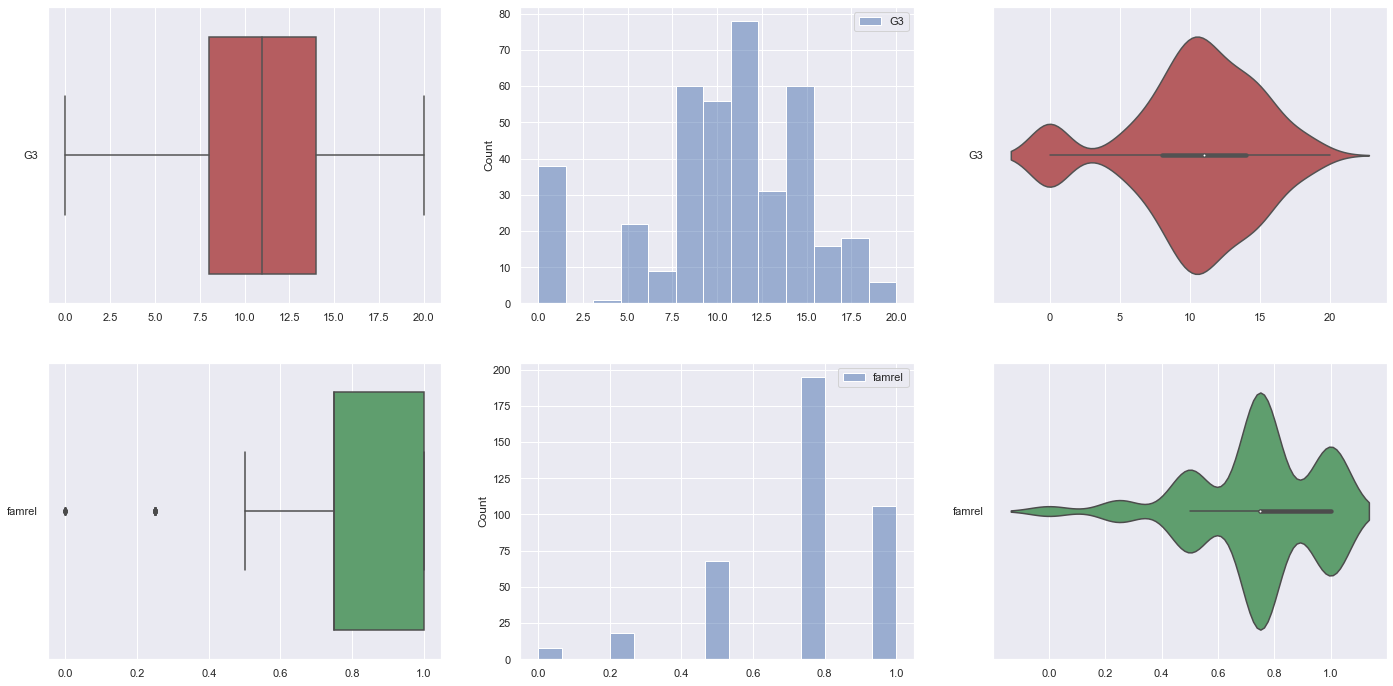

In [38]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = G3, orient = "h", ax = axes[0,0], color = 'r')
sb.histplot(data = G3, ax = axes[0,1], color = 'r')
sb.violinplot(data = G3, orient = "h", ax = axes[0,2], color = 'r')

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = famrel, orient = "h", ax = axes[1,0], color = 'g')
sb.histplot(data = famrel, ax = axes[1,1], color = 'g')
sb.violinplot(data = famrel, orient = "h", ax = axes[1,2], color = 'g')

In [39]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([famrel, G3], axis = 1).reindex(famrel.index)
jointDF

,famrel,G3
0,0.75,6
1,1.00,6
2,0.75,10
3,0.50,15
4,0.75,10
...,...,...
390,1.00,9
391,0.25,16
392,1.00,7
393,0.75,10


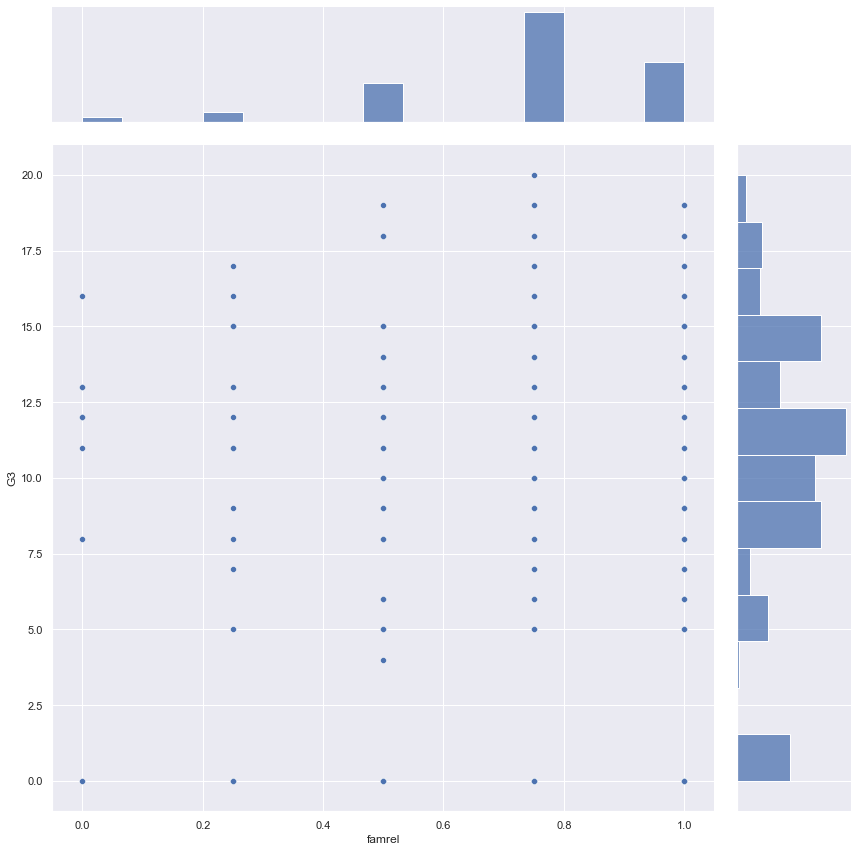

In [40]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "famrel", y = "G3", height = 12)

In [41]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

,famrel,G3
famrel,1.000000,0.051363
G3,0.051363,1.000000


<AxesSubplot:>

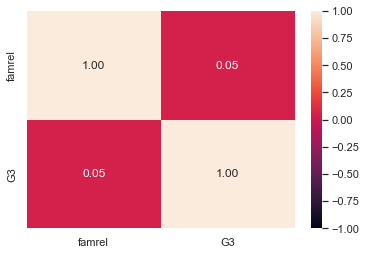

In [42]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [43]:
# Extract only the numeric data variables
numDF = pd.DataFrame(mainData[["G3", "famrel", "studytime", "health", "absences"]])

# Summary Statistics for all Variables
numDF.describe()

,G3,famrel,studytime,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,10.415190,0.736076,0.345148,0.638608,0.076118
std,4.581443,0.224165,0.279747,0.347576,0.106708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.750000,0.000000,0.500000,0.000000
50%,11.000000,0.750000,0.333333,0.750000,0.053333
75%,14.000000,1.000000,0.333333,1.000000,0.106667
max,20.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

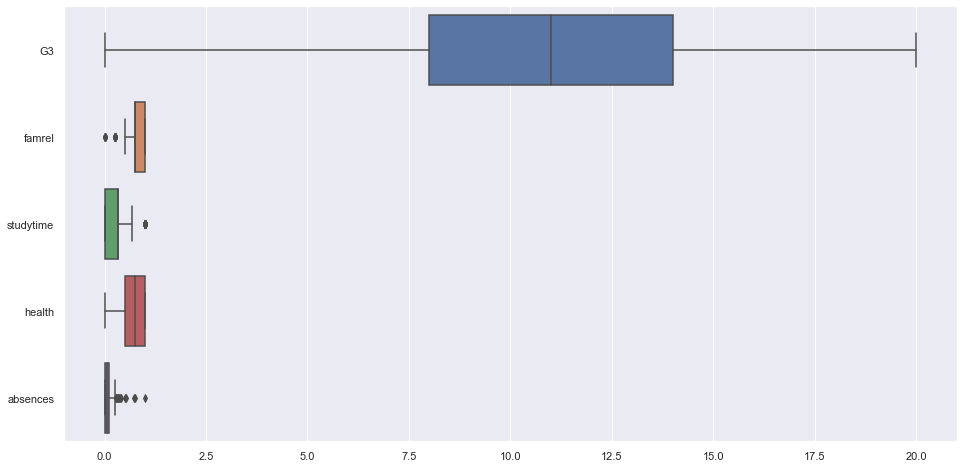

In [44]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF, orient = "h")

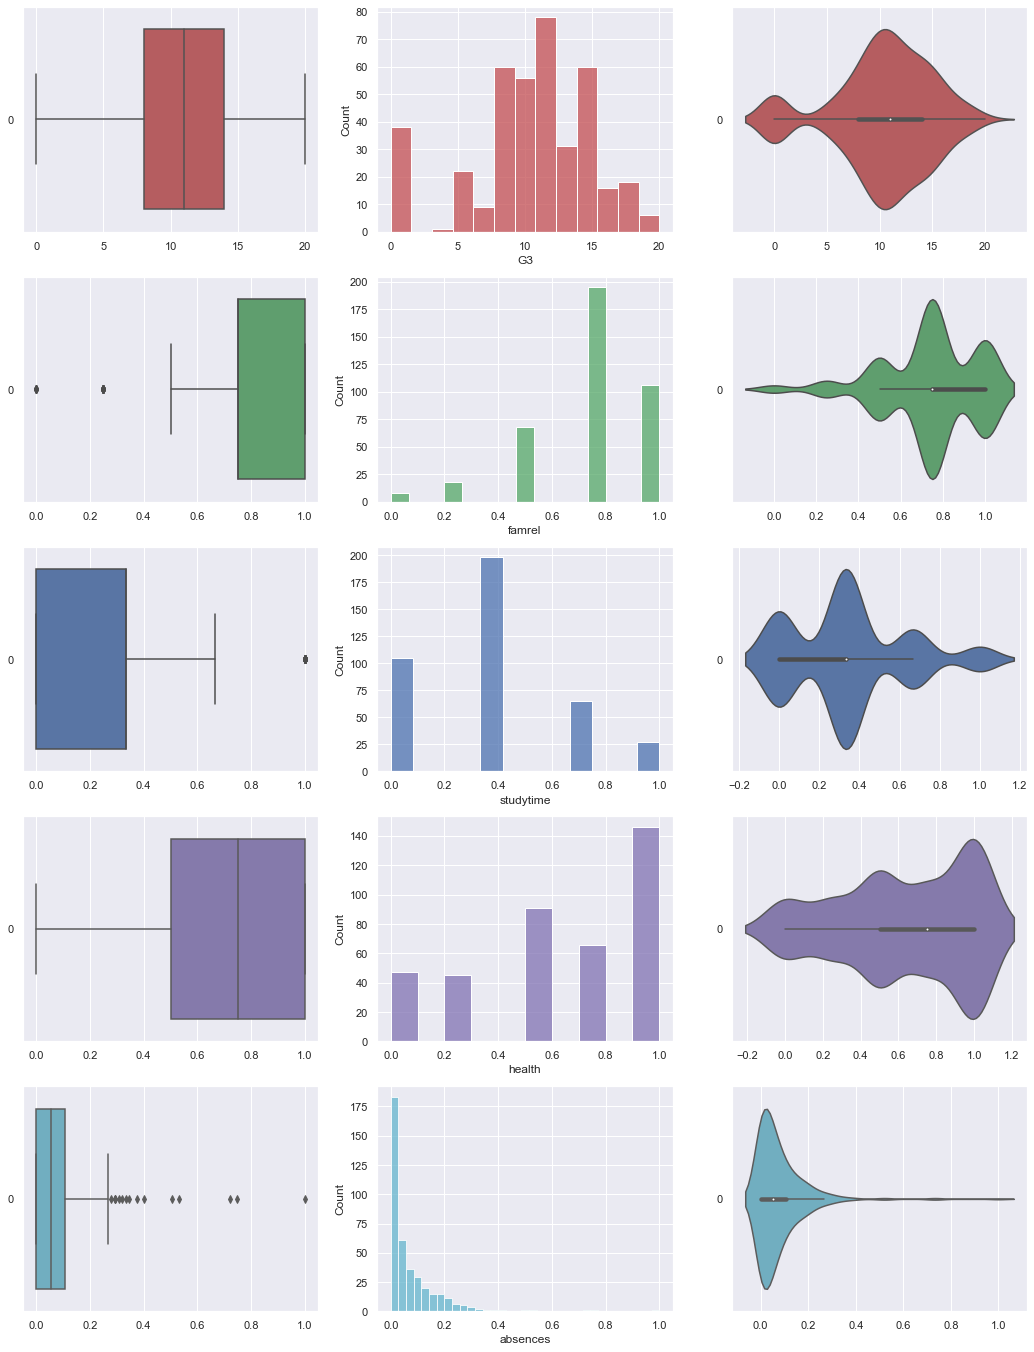

In [45]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0], color = colors[count])
    sb.histplot(data = numDF[var], ax = axes[count,1], color = colors[count])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2], color = colors[count])
    count += 1

In [46]:
# Calculate the complete  correlation matrix
numDF.corr()

,G3,famrel,studytime,health,absences
G3,1.000000,0.051363,0.097820,-0.061335,0.034247
famrel,0.051363,1.000000,0.039731,0.094056,-0.044354
studytime,0.097820,0.039731,1.000000,-0.075616,-0.062700
health,-0.061335,0.094056,-0.075616,1.000000,-0.029937
absences,0.034247,-0.044354,-0.062700,-0.029937,1.000000


<AxesSubplot:>

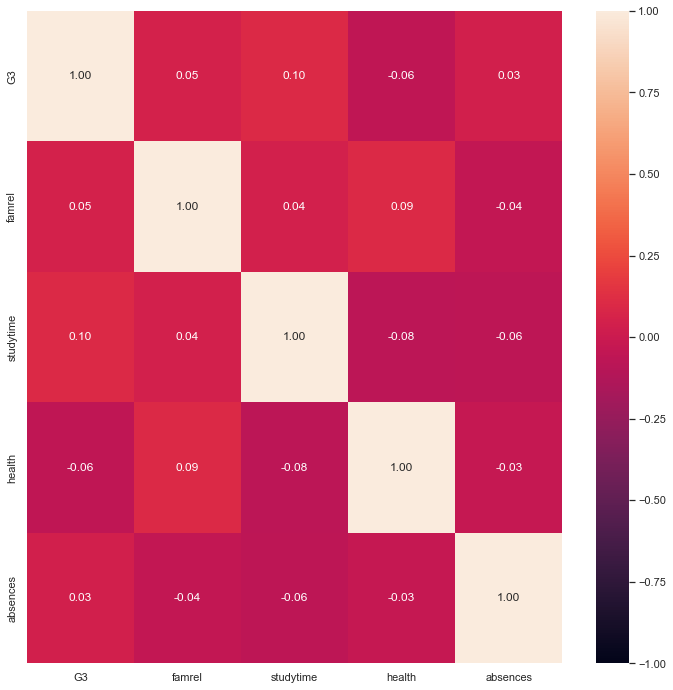

In [47]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

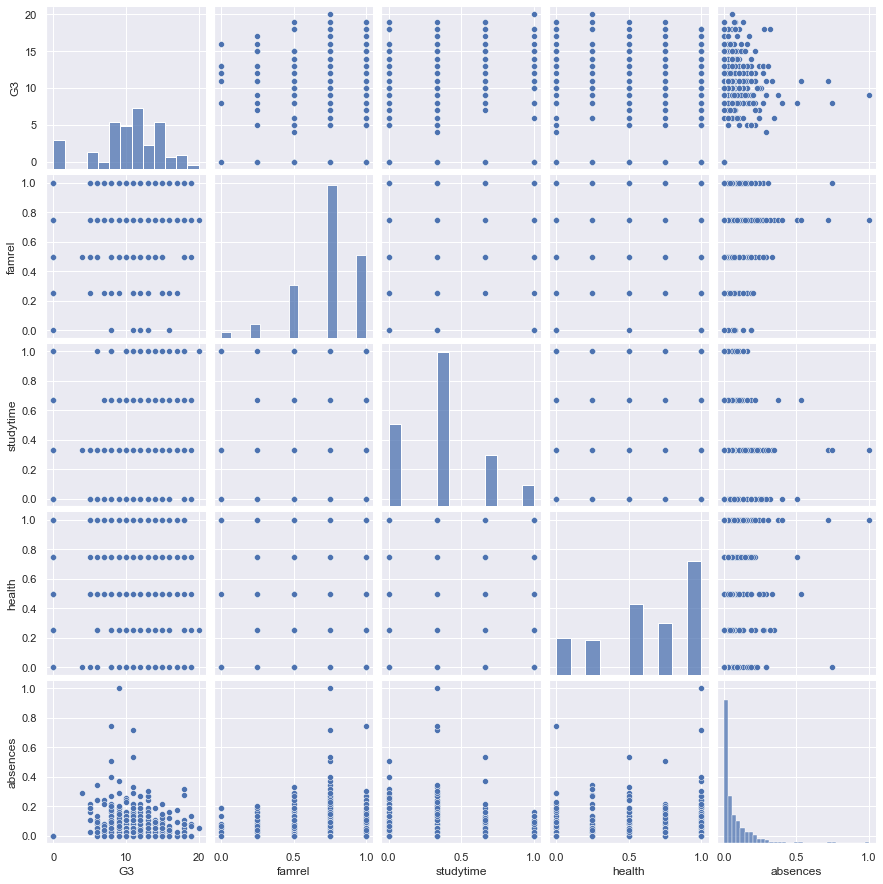

In [48]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

In [49]:
# # Import LinearRegression model from Scikit-Learn
# from sklearn.linear_model import LinearRegression

# # Create a Linear Regression object
# linreg = LinearRegression()

In [50]:
# y = pd.DataFrame(mainData["G3"])  # Response
# X = pd.DataFrame(mainData[["famrel", "studytime", "health", "absences"]])        # Predictor

In [51]:
# # Import train_test_split from sklearn
# from sklearn.model_selection import train_test_split

# # Split the Dataset into Train and Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# # Check the sample sizes
# print("Train Set :", y_train.shape, X_train.shape)
# print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (296, 1) (296, 4)
Test Set  : (99, 1) (99, 4)


In [52]:
# # Summary Statistics for Response
# y_train.describe()

,G3
count,296.000000
mean,10.412162
std,4.724877
min,0.000000
25%,8.750000
50%,11.000000
75%,14.000000
max,20.000000


In [53]:
# # Summary Statistics for Predictors
# X_train.describe()

,famrel,studytime,health,absences
count,296.000000,296.000000,296.000000,296.000000
mean,0.739865,0.335586,0.646959,0.078063
std,0.220512,0.285221,0.347423,0.113951
min,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,0.500000,0.000000
50%,0.750000,0.333333,0.750000,0.053333
75%,1.000000,0.333333,1.000000,0.106667
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

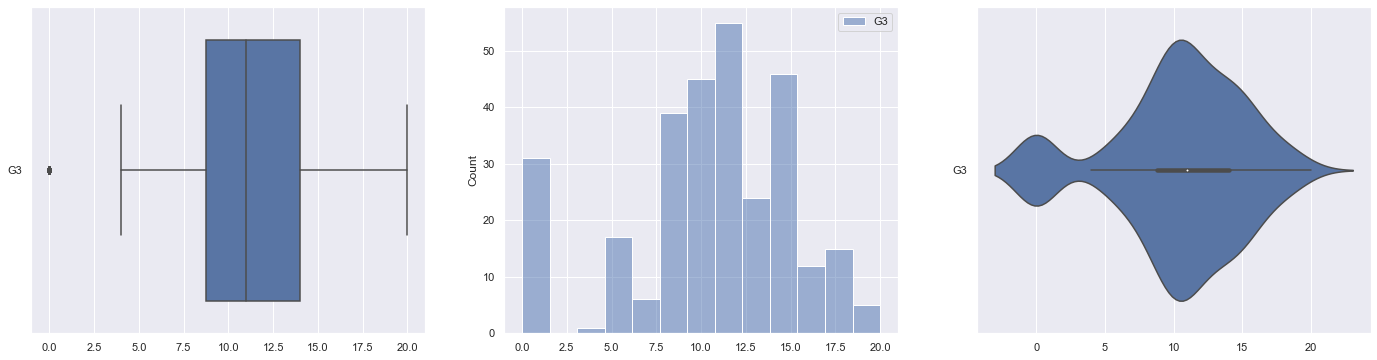

In [54]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

<AxesSubplot:>

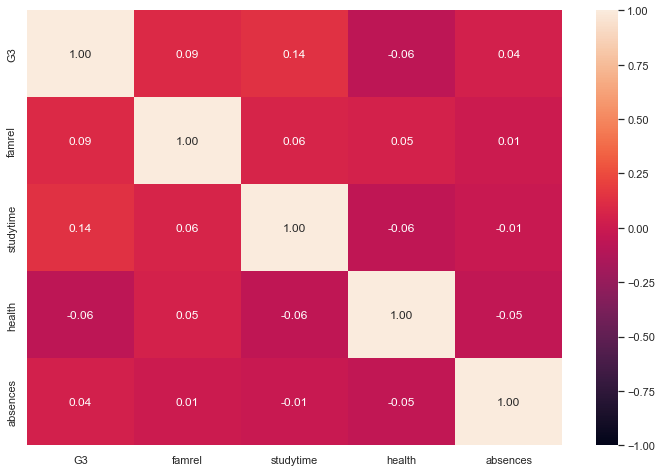

In [55]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

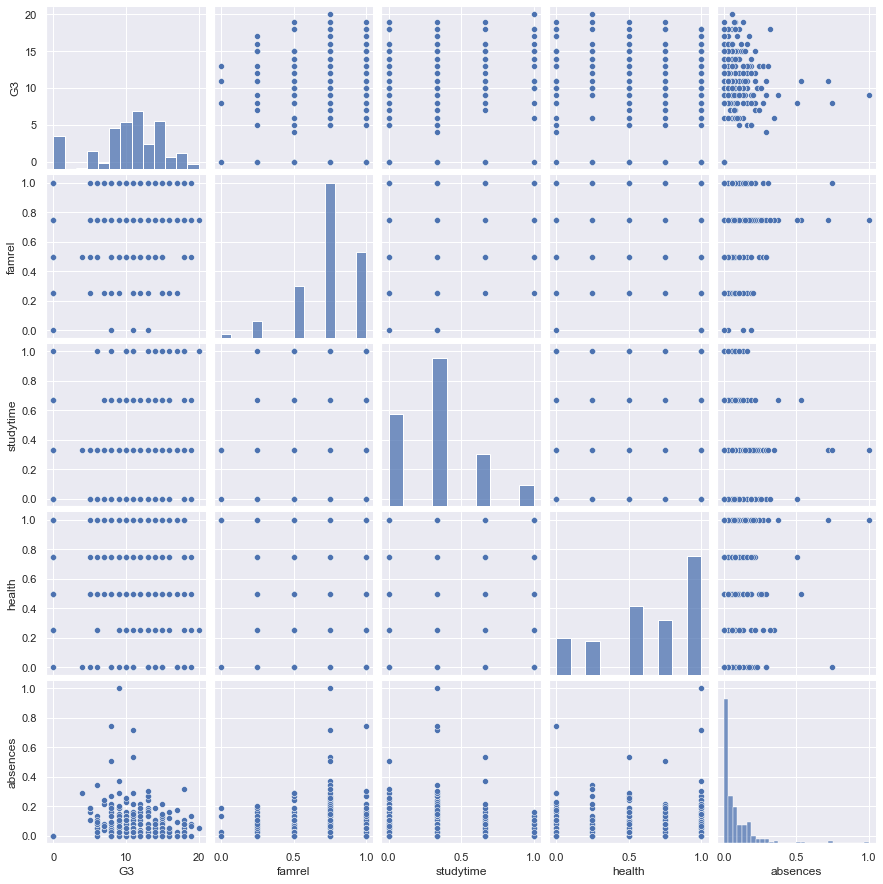

In [56]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

# Machine Learning Models - Guerta Uno Gabriel Yap
## 1) Linear Regression (Peng Teng Kang)
## 2) Decision Tree
## 3) Random Forest Regression

In [57]:
mainData = pd.read_csv('processedmath.csv')
mainData.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3,grades
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,1,0,5,6,6,D
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,1,1,0,5,5,6,D
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,1,0,7,8,10,C
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,15,14,15,B
4,16,3,3,1,2,0,4,3,2,1,...,0,1,1,0,1,0,6,10,10,C


In [58]:
mainData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,19.000000,20.000000


In [59]:
# #convert binary data to 0's and 1's
# categorical_features = [
#     features for features in mainData.columns if mainData[features].dtype == 'O']
# #print(len(categorical_features))
# #mainData[categorical_features].head()

# for feature in categorical_features:
#     labels_ordered = mainData.groupby(
#         [feature])['G3'].mean().sort_values().index
#     labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
#     mainData[feature] = mainData[feature].map(labels_ordered)

# mainData[categorical_features].head()

## 1) Linear Regression

Intercept of Regression 	: b =  [-6.54304819e+11]
Coefficients of Regression 	: a =  [[-2.54674222e-01  5.01986785e-02 -5.41903881e-02  1.70347251e-01
  -1.74599728e-01 -2.38634883e-01  4.57827858e-01  1.23795832e-01
  -3.43696458e-02 -2.87389642e-01  3.55124752e-01  7.88001016e-02
   5.63740706e-02 -6.83020245e+11 -6.83020245e+11  2.63511262e+11
   2.63511262e+11 -5.74053894e+11 -5.74053894e+11  1.92556879e+11
   1.92556879e+11  2.92886945e+11  2.92886945e+11 -8.59398159e+10
  -8.59398159e+10 -8.59398159e+10 -8.59398159e+10 -8.59398159e+10
   1.40473490e+11  1.40473490e+11  1.40473490e+11  1.40473490e+11
   1.40473490e+11  3.41978307e+11  3.41978307e+11  3.41978307e+11
   3.41978307e+11  1.70910614e+11  1.70910614e+11  1.70910614e+11
   5.46893868e+11  5.46893868e+11 -1.32533154e+11 -1.32533154e+11
   2.08626110e+11  2.08626110e+11 -2.59925495e+11 -2.59925495e+11
  -2.16529507e+11 -2.16529507e+11  1.64649445e+11  1.64649445e+11
  -1.53948736e+10 -1.53948736e+10  2.99214885e+11  2.9921

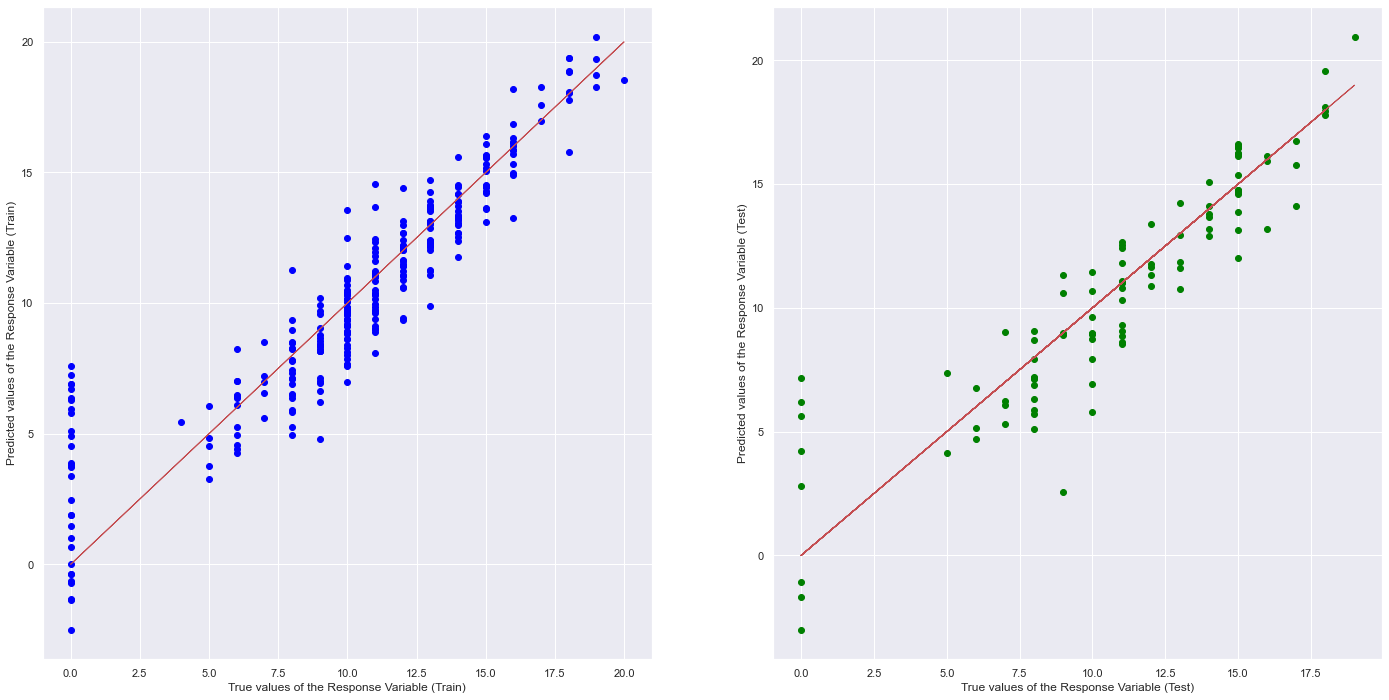

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8449604949400341
Mean Squared Error (MSE) 	: 3.2408646558587617

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8095350086682582
Mean Squared Error (MSE) 	: 3.9730441401703187



In [60]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
response= ["G3"]
#predictors = ["famrel","studytime","health"]
# predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]
# predictors = ["famrel","absences"]

y = pd.DataFrame(mainData[response])
X = mainData.drop(['grades','G3'],axis = 1)
# X = pd.DataFrame(mainData[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## 2) Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7871621621621622

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7676767676767676



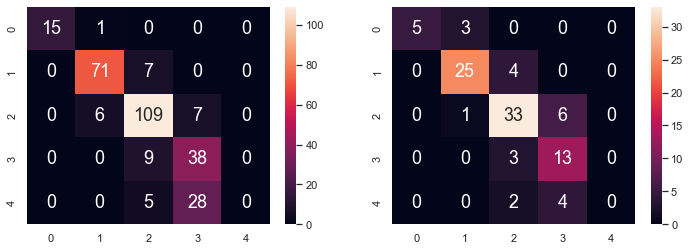

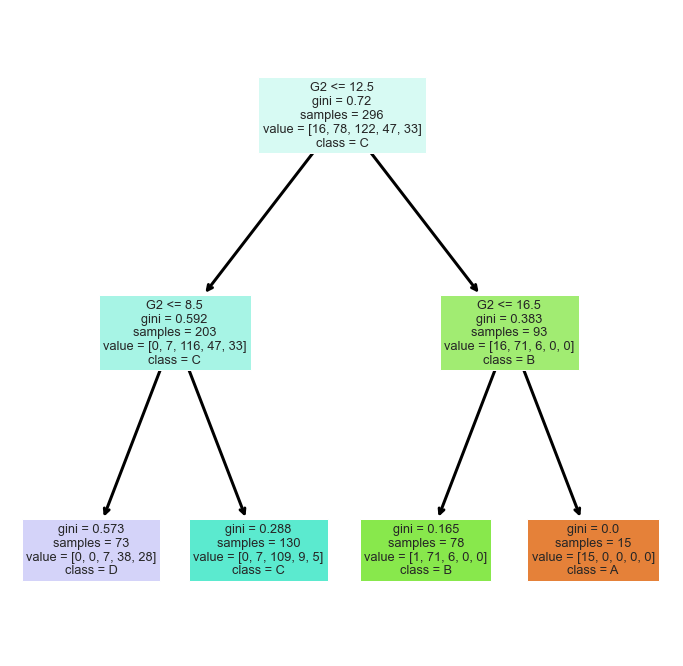

In [61]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

response= ["grades"]
#predictors = ["famrel","studytime","health","absences"]
#predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]


# Extract Response and Predictors
y = pd.DataFrame(mainData[response])
X = mainData.drop(['grades','G3'],axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.847972972972973

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8484848484848485



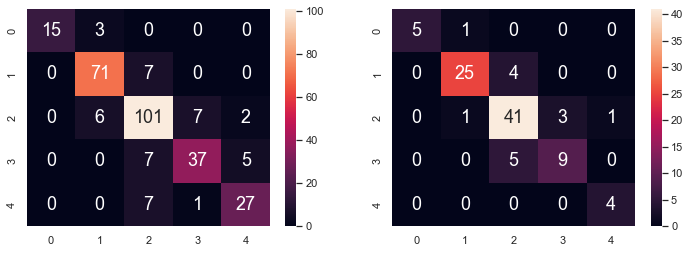

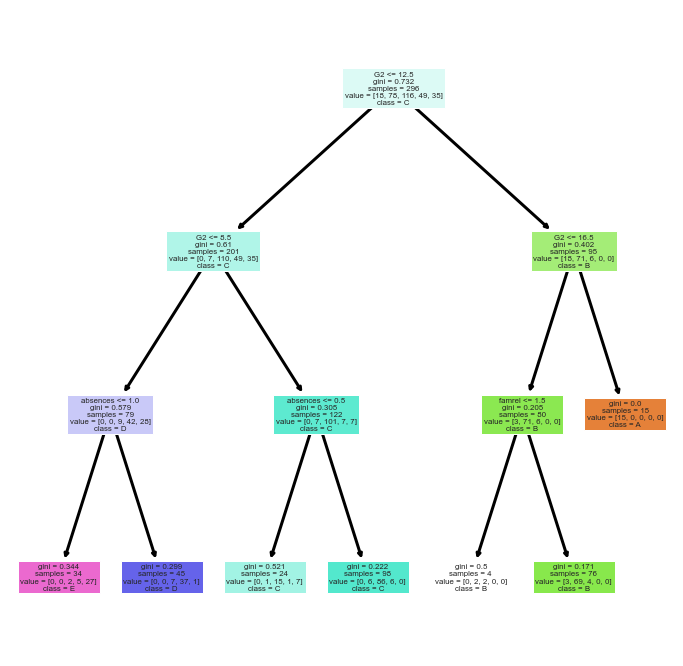

In [62]:
# Predict Data
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
response= ["grades"]
#predictors = ["famrel","studytime","health","absences"]
#predictors = ["famrel","studytime","health","absences","schoolsup","Medu","Fedu","Mjob","Fjob","traveltime","higher"]

y = pd.DataFrame(mainData[response])
X = mainData.drop(['grades','G3'],axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [63]:
# Extract rows for Prediction
mainData_pred = mainData[:10]
mainData_pred

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G1,G2,G3,grades
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,1,0,5,6,6,D
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,1,1,0,5,5,6,D
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,1,0,7,8,10,C
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,15,14,15,B
4,16,3,3,1,2,0,4,3,2,1,...,0,1,1,0,1,0,6,10,10,C
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,1,0,15,15,15,B
6,16,2,2,1,2,0,4,4,4,1,...,0,1,0,1,1,0,12,12,11,C
7,17,4,4,2,2,0,4,1,4,1,...,0,1,1,0,1,0,6,5,6,D
8,15,3,2,1,2,0,4,2,2,1,...,0,1,0,1,1,0,16,18,19,A
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,1,0,14,15,15,B


In [64]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(mainData_pred.drop(['grades','G3'],axis = 1))

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array(['D', 'D', 'D', 'B', 'C', 'B', 'C', 'D', 'A', 'B'], dtype=object)

In [65]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["predGrades"], index = mainData_pred.index)
mainData_acc = pd.concat([mainData_pred[["grades"]], y_pred], axis = 1)

mainData_acc

,grades,predGrades
0,D,D
1,D,D
2,C,D
3,B,B
4,C,C
5,B,B
6,C,C
7,D,D
8,A,A
9,B,B


## 3) Random Forest Regression

In [66]:
#mainData = pd.read_csv('Maths.csv')

#X = pd.DataFrame(mainData[predictors]) 
y = mainData['G3']
#X.shape


In [67]:
# df = pd.read_csv('processedmath.csv')
# dfX = df.iloc[:, 0:(len(df.columns)-4)] # Features
# dfy = df.G3 # Target variable
# X = dfX.values
# y = dfy.values
# print(type(X))
# print(X)

In [68]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(296, 58) (99, 58) (296,) (99,)


In [69]:
#Random Forest Model (import)
from sklearn.ensemble import RandomForestRegressor

#Instantiation of the model
model = RandomForestRegressor(max_depth = 2, n_estimators = 20, random_state = 1)
#model = RandomForestRegressor(n_estimators = 20)

In [70]:
#Fitting model
G3_rf = model.fit(X_train,y_train.ravel())

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
print('The training r_sq is:  %.2f'% G3_rf.score(X_train,y_train))

The training r_sq is:  0.82


In [72]:
ytrain_pred=G3_rf.predict(X_train)
print('THE MAE is %.2f'% mean_absolute_error(y_train, ytrain_pred))
print('THE MSE is %.2f'% mean_squared_error(y_train, ytrain_pred))
print('THE RMSE is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('THE EVS is %.2f'% explained_variance_score(y_train, ytrain_pred))


THE MAE is 1.50
THE MSE is 3.97
THE RMSE is 1.99
THE EVS is 0.82


In [73]:
y_test_pred=G3_rf.predict(X_test)
print(y_test_pred[:10])
print('The testing r_sq is %.2f'% G3_rf.score(X_test, y_test))

[12.36141906 16.09615509 16.09615509 13.57976168 12.14689271  8.3098781
  8.10358991  8.10358991  8.10358991 12.36141906]
The testing r_sq is 0.83


In [74]:
print('THE MAE is %.2f'% mean_absolute_error(y_test, y_test_pred))
print('THE MSE is %.2f'% mean_squared_error(y_test, y_test_pred))
print('THE RMSE is %.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('THE EVS is %.2f'% explained_variance_score(y_test, y_test_pred))

THE MAE is 1.31
THE MSE is 2.97
THE RMSE is 1.72
THE EVS is 0.83


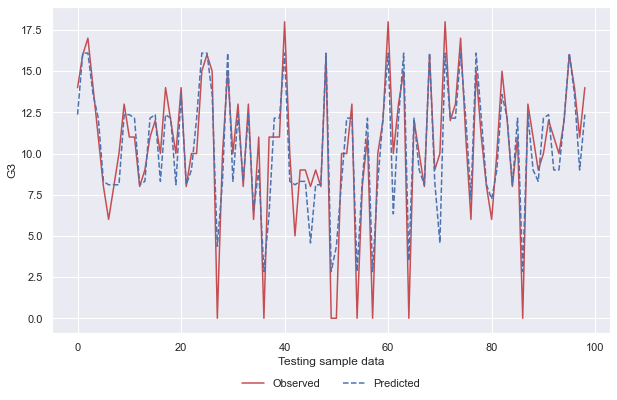

In [75]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='r',linestyle ='-')
plt.plot(x_ax,y_test_pred,label='Predicted',color ='b',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

D:\SchoolStuff\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


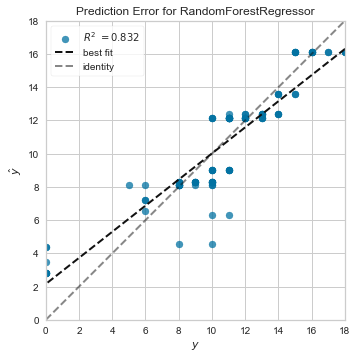

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(G3_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

D:\SchoolStuff\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


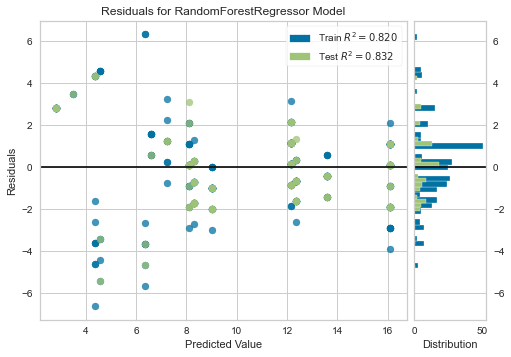

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
#Plot the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(G3_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [78]:
#The k-fold CV
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(G3_rf,X_train,y_train, scoring = 'neg_mean_squared_error',cv =10)
#seed = 7
score_train

array([-3.66067169, -8.87522267, -4.99390835, -4.3709219 , -3.15043715,
       -4.75357936, -4.46738812, -5.91105617, -1.3679926 , -4.23186041])

In [79]:
#The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

4.5783038421445506


In [80]:
#The testing model CV
score_test = cross_val_score(G3_rf, X_test,y_test,scoring='neg_mean_squared_error',cv=5)
score_train

array([-3.66067169, -8.87522267, -4.99390835, -4.3709219 , -3.15043715,
       -4.75357936, -4.46738812, -5.91105617, -1.3679926 , -4.23186041])

In [81]:
#The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

4.5783038421445506


In [82]:
#Random Forest Feature Ranking
from sklearn.pipeline import Pipeline
f_list=list(X.columns)
f_importance = pd.Series(G3_rf.feature_importances_,index=f_list).sort_values(ascending=False)
print(f_importance)

G2                   0.883897
absences             0.116103
paid_no              0.000000
Fjob_teacher         0.000000
reason_course        0.000000
reason_home          0.000000
reason_other         0.000000
reason_reputation    0.000000
guardian_father      0.000000
guardian_mother      0.000000
guardian_other       0.000000
schoolsup_no         0.000000
schoolsup_yes        0.000000
famsup_no            0.000000
famsup_yes           0.000000
paid_yes             0.000000
Fjob_other           0.000000
activities_no        0.000000
activities_yes       0.000000
nursery_no           0.000000
nursery_yes          0.000000
higher_no            0.000000
higher_yes           0.000000
internet_no          0.000000
internet_yes         0.000000
romantic_no          0.000000
romantic_yes         0.000000
G1                   0.000000
Fjob_services        0.000000
age                  0.000000
Medu                 0.000000
Fjob_at_home         0.000000
Fedu                 0.000000
traveltime

# Tuning Parameters using GridSearch

In [83]:
from sklearn.model_selection import GridSearchCV

#n_estimators --> the number of runs XGBoost will try to learn
#max_features --> the number of features to consider when looking for the best split
#max_depth --> Maximum depth of a tree. Increasing this value will make the model more complex and more likely to 
#              overfit.
#min_samples_split --> minimum number of samples required to split an internal node
#min_samples_leaf --> minimum number of samples required to be at a leaf node
#bootstrap --> Whether bootstrap samples are used when building trees. 
#.             If False, the whole dataset is used to build each tree

param_grid = {
    "n_estimators": [25, 30, 35, 40, 50, 100],
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_depth": [2, 4, 10, 12, 16],
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [2, 4, 8, 15],
    "bootstrap": ['True', 'False']
}

gs = GridSearchCV(G3_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=10)
gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
3.0661379754764497
{'bootstrap': 'True', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 30}


In [84]:
rf_reg_final = RandomForestRegressor(max_depth=10,
                                     random_state=1, 
                                     n_estimators=30, 
                                     bootstrap='True', 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=2)
rf_reg_final.fit(X_train, y_train.ravel()) 
print('training accuracy (r_sq) is: ', rf_reg_final.score(X_train,y_train))
print('testing accuracy (r_sq) is: ', rf_reg_final.score(X_test,y_test))
print('training mse: ', mean_squared_error(rf_reg_final.predict(X_train), y_train))
print('testing mse: ', mean_squared_error(rf_reg_final.predict(X_test), y_test))

training accuracy (r_sq) is:  0.9463307333799292
testing accuracy (r_sq) is:  0.8970426678106117
training mse:  1.1831097517067182
testing mse:  1.814280261445695


In [85]:
from sklearn.model_selection import cross_val_score, cross_validate
results  = cross_validate(rf_reg_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('cross val training mse:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mse:', sum(-results['test_score'])/len(results['test_score']))

cross val training mse: 1.1451644772567293
cross val testing mse: 3.4851451796209716


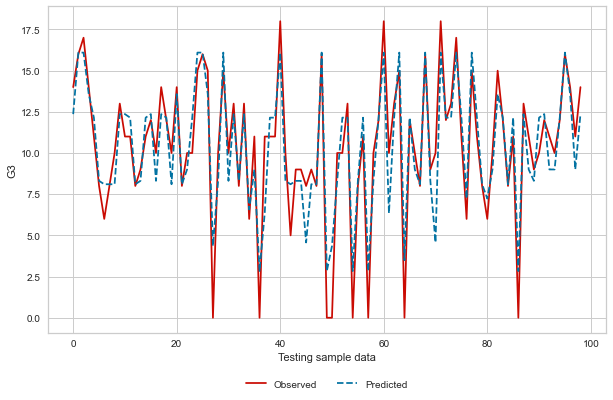

In [86]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='r',linestyle ='-')
plt.plot(x_ax,y_test_pred,label='Predicted',color ='b',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

D:\SchoolStuff\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


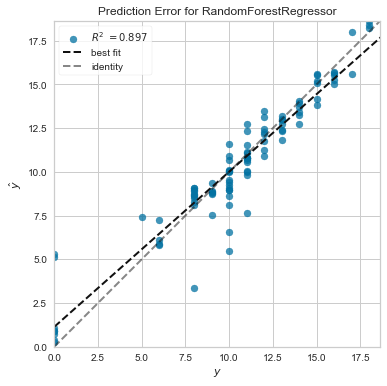

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [87]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf_reg_final)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# Heng Zi Hui

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 300%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 2%;
           font-family: "Cambria";'>
XGBoost Regression Model
<a class="anchor" id="1"></a> 

#### Using the processedmath dataset, that was processed using the MainProject - Data Processing.ipynb, to convert categorical values into numerical values for regression model.

In [88]:
# Import NumPy and Pandas libraries

import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from scipy.stats import uniform

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Import dataset
df = pd.read_csv('processedmath.csv')

# Make a copy of the dataframe
df_copy = df.copy()


In [89]:
dfX = df.iloc[:, 0:(len(df.columns)-2)] # Features
dfy = df.G3 # Target variable
print(dfX.shape)
print(type(dfX))
print(dfy.shape)
print(type(dfy))

(395, 58)
<class 'pandas.core.frame.DataFrame'>
(395,)
<class 'pandas.core.series.Series'>


In [90]:
# Extract the column names from the two datasets
col_names = list(dfX.columns)
col_names.append(dfy.name)
print(col_names)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes', 'G1', 'G2', 'G3']


In [91]:
# Conversion from Pandas Dataframe to NumPy Array
X = dfX.values
y = dfy.values
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[18  4  4 ...  0  5  6]
 [17  1  1 ...  0  5  5]
 [15  1  1 ...  0  7  8]
 ...
 [21  1  1 ...  0 10  8]
 [18  3  2 ...  0 11 12]
 [19  1  1 ...  0  8  9]]


##### Chose XGBoost Regression Model: 
- For its execution speed and model performance
- It’s precise, it adapts well to all types of data and problems, it has excellent documentation, and overall very easy to use. 

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=2)

xgbR = XGBRegressor(n_estimators = 20, learning_rate = 0.1)
xgbR.fit(X_train, y_train.ravel())

test_mse_before_tune =  mean_squared_error(xgbR.predict(X_test), y_test)
train_mse_before_tune = mean_squared_error(xgbR.predict(X_train), y_train)

test_mae_before_tune = mean_absolute_error(xgbR.predict(X_test), y_test)
train_mae_before_tune = mean_absolute_error(xgbR.predict(X_train), y_train)

test_RMSE_before_tune = np.sqrt(mean_squared_error(xgbR.predict(X_test), y_test))
train_RMSE_before_tune = np.sqrt(mean_squared_error(xgbR.predict(X_train), y_train))

test_EVS_before_tune = explained_variance_score(xgbR.predict(X_test), y_test)
train_EVS_before_tune = explained_variance_score(xgbR.predict(X_train), y_train)

print('***Original Model***')
print('----R Square (Variance)----')
print('Training accuracy (r_sq) is: ', xgbR.score(X_train,y_train))
print('Testing accuracy (r_sq) is: ', xgbR.score(X_test,y_test))

print('\n----Mean Squared Error----')
print('Training mean squared error is: ', train_mse_before_tune)
print('Testing mean squared error is: ', test_mse_before_tune)

print('\n----Mean Absolute Error----')
print('Training mean absolute error is: ', train_mae_before_tune)
print('Testing mean absolute error is: ', test_mae_before_tune)

print('\n----Root Mean Square Error----')
print('Training root mean squared error is: ', test_RMSE_before_tune)
print('Testing root mean squared error is: ', train_RMSE_before_tune)

print('\n----Explained Variance Score----')
print('Training explained variance score is: ', test_EVS_before_tune)
print('Testing explained variance score is: ', train_EVS_before_tune)

***Original Model***
----R Square (Variance)----
Training accuracy (r_sq) is:  0.8826155538754211
Testing accuracy (r_sq) is:  0.7783179115786188

----Mean Squared Error----
Training mean squared error is:  2.587676181450642
Testing mean squared error is:  3.906408885956202

----Mean Absolute Error----
Training mean absolute error is:  1.3653495219328466
Testing mean absolute error is:  1.5957382167830612

----Root Mean Square Error----
Training root mean squared error is:  1.9764637325172962
Testing root mean squared error is:  1.6086255566323202

----Explained Variance Score----
Training explained variance score is:  0.8179040449030285
Testing explained variance score is:  0.9417358225467752


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 1%;
           font-family: "Cambria";'>
K-Fold Cross Validation
<a class="anchor" id="1"></a> 

#### Instead of spliting into train and test data, we randomly split the full dataset into 10 folds (K=10) and then train & evaluate the XGBoost model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores for both training and testing scores:

##### Choosing k=10 
"Through various experimentations from Data Scientists, Machine Learning Engineers, and Researchers they have found that choosing a k-value of 10 has proven to provide a low bias and a modest variance." - https://www.kdnuggets.com/2022/07/kfold-cross-validation.html 

In [93]:
results = cross_validate(xgbR, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score = True)
print('train score: ', results['train_score'])
print('test score: ', results['test_score'])

train score:  [-2.48896677 -2.50578374 -2.5054818  -2.65052606 -2.53063612 -2.60751974
 -2.63046647 -2.49928733 -2.56816448 -2.627477  ]
test score:  [-3.93593726 -5.11272776 -5.76776828 -5.24430311 -6.21425964 -3.35680186
 -4.85913557 -7.3548035  -6.02076148 -5.54405187]


#### The cross validation training and testing accuracy will be an average of the 10 evaluation scores respectively, shown per below.

In [94]:
print('***Original Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

***Original Model***
cross val training mean_squared_error is: 2.5614309505109425
cross val testing mean_squared_error is: 5.341055034213677


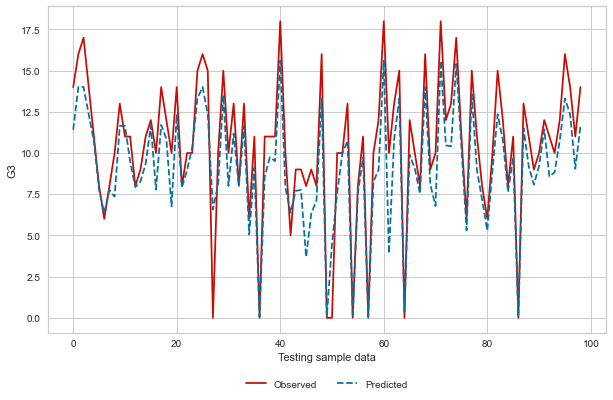

In [95]:
y_test_pred=xgbR.predict(X_test)

plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='r',linestyle ='-')
plt.plot(x_ax,y_test_pred,label='Predicted',color ='b',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

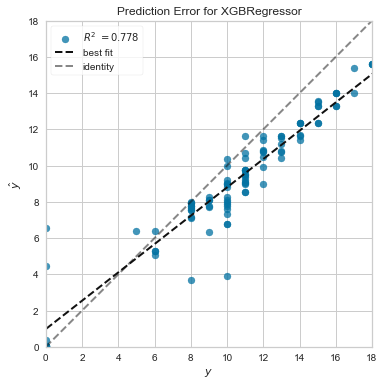

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [96]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(xgbR)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 1%;
           font-family: "Cambria";'>
(Tuning #1) Statsmodel Ordinary Least Squares
<a class="anchor" id="1"></a> 

#### Ordinary Least Squares regression (OLS) is a common technique estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression)

In [97]:
#The statsmodel.api provides key summary statistics
#The lm2 model refers to statsmodel.api model
#Add a constant to the X_train dataset and rename it as X_train_sm
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)
print(X_train_sm.shape)

#Create another model using statsmodel.api using the Ordinary Least Squares (OLS) method for the model
lm2 = sm.OLS(y_train, X_train_sm).fit()

lm2.summary()

[[ 1. 19.  1. ...  1.  9.  9.]
 [ 1. 17.  2. ...  1. 10. 10.]
 [ 1. 18.  1. ...  1. 14. 12.]
 ...
 [ 1. 15.  1. ...  1.  8.  6.]
 [ 1. 16.  4. ...  0. 14. 14.]
 [ 1. 16.  2. ...  0.  6.  7.]]
(296, 59)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     32.57
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.19e-79
Time:                        18:09:30   Log-Likelihood:                -606.39
No. Observations:                 296   AIC:                             1297.
Df Residuals:                     254   BIC:                             1452.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1562      0.296     -0.527      0.598      -0.740       0.427
x1            -0.2037      0.126     -1.619      0.107      -0.451       0.044
x2             0.1606      0.185      0.867      0.387      -0.204       0.525
x3             0.0144      0.162      0.089      0.929      -0.304       0.333
x4             0.1671      0.194      0.862      0.389      -0.215       0.549
x5            -0.1232      0.174     -0.708      0.480      -0.466       0.220
x6             0.2728      0.224      1.217      0.225      -0.169       0.714
x7             0.3248      0.143      2.275      0.024       0.044       0.606
x8             0.1078      0.133      0.811      0.418      -0.154       0.370
x9            -0.0160      0.135     -0.119      0.906      -0.282       0.250
x10           -0.1968      0.207     -0.951      0.342      -0.604       0.211
x11            0.1723      0.145      1.191      0.235      -0.113       0.457
x12            0.0707      0.092      0.765      0.445      -0.111       0.253
x13            0.0437      0.016      2.755      0.006       0.012       0.075
x14           -0.4472      0.223     -2.008      0.046      -0.886      -0.009
x15            0.2910      0.305      0.955      0.340      -0.309       0.891
x16           -0.1089      0.202     -0.540      0.590      -0.506       0.288
x17           -0.0473      0.214     -0.221      0.825      -0.469       0.374
x18           -0.1102      0.248     -0.445      0.656      -0.598       0.377
x19           -0.0460      0.214     -0.215      0.830      -0.466       0.374
x20           -0.1566      0.206     -0.759      0.449      -0.563       0.250
x21            0.0004      0.208      0.002      0.999      -0.409       0.410
x22           -0.1233      0.254     -0.486      0.627      -0.623       0.376
x23           -0.0329      0.249     -0.132      0.895      -0.524       0.458
x24            0.0043      0.365      0.012      0.991      -0.715       0.723
x25           -0.2531      0.417     -0.607      0.544      -1.074       0.568
x26            0.0566      0.243      0.232      0.816      -0.423       0.536
x27            0.0970      0.249      0.390      0.697      -0.392       0.586
x28           -0.0610      0.358     -0.171      0.865      -0.765       0.643
x29            0.0527      0.456      0.116      0.908      -0.846       0.951
x30            0.4098      0.485      0.844      0.399      -0.546       1.366
x31            0.0545      0.257      0.213      0.832      -0.451       0.560
x32           -0.4724      0.283     -1.671      0.096      -1.029       0.084
x33           -0.2008      0.441     -0.455      0.649      -1.069       0.668
x34           -0.0123      0.221     -0.056      0.956      -0.447       0.422
x35           -0.1913      0.234     -0.817      0.415      -0.653       0.270
x3

In [98]:
#Using important features (P < 0.05) to evaluate the model
dfX_new = df[['famrel', 'absences', 'school_GP', 'G1', 'G2']]
dfy_new = df.G3
col_names = list(dfX_new.columns)
col_names.append(dfy_new.name)
print(col_names)
X = dfX_new.values
y = dfy_new.values

X_train,X_test,y_train,y_test=train_test_split(X, y.ravel(), test_size=0.25, random_state=2)
#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25)

['famrel', 'absences', 'school_GP', 'G1', 'G2', 'G3']


In [99]:
xgbR_new = XGBRegressor(n_estimators = 20, learning_rate = 0.1)
xgbR_new.fit(X_train, y_train.ravel())

print('***New Model***')
print('----R Square (Variance)----')
print('Training accuracy (r_sq) after 1st tune is: ', xgbR_new.score(X_train,y_train))
print('Testing accuracy (r_sq) after 1st tune is: ', xgbR_new.score(X_test,y_test))

print('\n----Root Mean Square Error----')
print('Training root mean squared error is: ', mean_squared_error(xgbR_new.predict(X_train), y_train))
print('Testing root mean squared error is: ', mean_squared_error(xgbR_new.predict(X_test), y_test))

print('\n----Mean Absolute Error----')
print('Training mean absolute error is: ', mean_absolute_error(xgbR_new.predict(X_train), y_train))
print('Testing mean absolute error is: ', mean_absolute_error(xgbR_new.predict(X_test), y_test))

***New Model***
----R Square (Variance)----
Training accuracy (r_sq) after 1st tune is:  0.8331218688016578
Testing accuracy (r_sq) after 1st tune is:  0.7871533265891144

----Root Mean Square Error----
Training root mean squared error is:  3.678737512196908
Testing root mean squared error is:  3.750714107212943

----Mean Absolute Error----
Training mean absolute error is:  1.5807533450424671
Testing mean absolute error is:  1.5477065398837582


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 1%;
           font-family: "Cambria";'>
(Tuning #2) Grid Search
<a class="anchor" id="1"></a> 

#### A Grid Search is an exhaustive search over every combination of specified parameter values.

In [100]:
xgbR_new = XGBRegressor()

#n_estimators --> the number of runs XGBoost will try to learn
#learning_rate --> (learning speed) Step size shrinkage used in update to prevents overfitting.
#max_depth --> Maximum depth of a tree. Increasing this value will make the model more complex and more likely to 
#              overfit.

param_grid = {
    "n_estimators": range(10,100),
    "learning_rate": [0.01, 0.03, 0.05, 0.09, 0.1, 0.2],
    "max_depth": [2,4,6,8]
}

gs = GridSearchCV(xgbR_new, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)

2.9543059058966543
{'learning_rate': 0.09, 'max_depth': 2, 'n_estimators': 62}


Create final model with best parameters found above from grid search

In [101]:
xgbR_final = XGBRegressor(n_estimators = 62,
                          learning_rate = 0.09,
                          max_depth = 2)

xgbR_final.fit(X_train, y_train.ravel())

preds = xgbR_final.predict(X_test)

test_mse_after_tune =  mean_squared_error(xgbR_final.predict(X_test), y_test)
train_mse_after_tune = mean_squared_error(xgbR_final.predict(X_train), y_train)

test_mae_after_tune = mean_absolute_error(xgbR_final.predict(X_test), y_test)
train_mae_after_tune = mean_absolute_error(xgbR_final.predict(X_train), y_train)

print('***Final Model***')
print('----R Square (Variance)----')
print('Training accuracy (r_sq) is: ', xgbR_final.score(X_train,y_train))
print('Testing accuracy (r_sq) is: ', xgbR_final.score(X_test,y_test))

print('\n----Mean Squared Error----')
print('Training MSE after tuning is: ', train_mse_after_tune)
print('Testing MSE after tuning is: ', test_mse_after_tune)

print('\n----Difference in MSE----')
print('The testing MSE has improved by ', train_mse_before_tune-train_mse_after_tune, 'after tuning.')
print('The testing MSE has improved by ', test_mse_before_tune-test_mse_after_tune, 'after tuning.')

print('\n----Mean Absolute Error----')
print('Training MAE after tuning is: ', train_mae_before_tune)
print('Testing MAE after tuning is: ', test_mae_before_tune)

***Final Model***
----R Square (Variance)----
Training accuracy (r_sq) is:  0.8901456368572296
Testing accuracy (r_sq) is:  0.925721497930853

----Mean Squared Error----
Training MSE after tuning is:  2.4216796033716963
Testing MSE after tuning is:  1.3089113450017726

----Difference in MSE----
The testing MSE has improved by  0.16599657807894586 after tuning.
The testing MSE has improved by  2.5974975409544294 after tuning.

----Mean Absolute Error----
Training MAE after tuning is:  1.3653495219328466
Testing MAE after tuning is:  1.5957382167830612


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 1%;
           font-family: "Cambria";'>
K-Folds Cross Validation (Final Model)
<a class="anchor" id="1"></a> 

In [102]:
results = cross_validate(xgbR_final, X, y.ravel(), scoring='neg_mean_squared_error', cv=10, return_train_score = True)
print('train score: ', results['train_score'])
print('test score: ', results['test_score'])

train score:  [-2.16936929 -2.11669462 -2.18691557 -2.1203035  -2.09965945 -2.27747984
 -1.99181197 -2.08693579 -1.81796531 -2.27302179]
test score:  [-1.92769987 -2.49473635 -1.75277036 -2.73416391 -2.58029435 -0.86030853
 -3.95833379 -3.49619717 -6.59142675 -0.83138164]


In [103]:
print('***Final Model***')
print('cross val training mean_squared_error is:', sum(-results['train_score'])/len(results['train_score']))
print('cross val testing mean_squared_error is:', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
cross val training mean_squared_error is: 2.1140157125925145
cross val testing mean_squared_error is: 2.7227312723629233


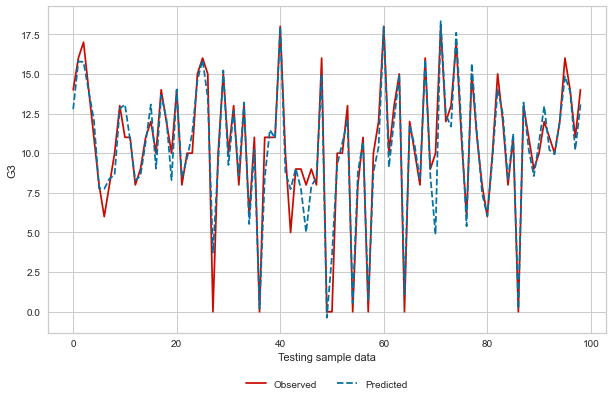

In [104]:

plt.rcParams['figure.figsize'] = (10,6)
x_ax=range(len(X_test))

plt.plot(x_ax,y_test,label='Observed',color ='r',linestyle ='-')
plt.plot(x_ax,preds,label='Predicted',color ='b',linestyle ='--')
plt.ylabel('G3')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5,-0.2), loc = 'lower center',ncol= 2, frameon = False)
plt.show()

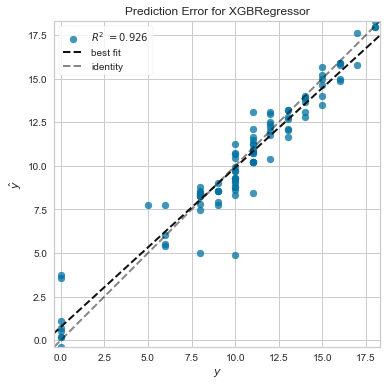

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [105]:
#Plot prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(xgbR_final)
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

<div style='color: #7A1712;
           background-color: #FECCC9;
           font-size: 300%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           padding: 2%;
           font-family: "Cambria";'>
Conclusion (Outcome)
<a class="anchor" id="1"></a> 